In [ ]:
# Notebook 3\5

In [1]:
# Functions

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp

In [296]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute1(df, target_features):
    """
    Impute missing values using KNNImputer, skipping the target features.

    Parameters:
    - df: DataFrame containing the features and target column with missing values.
    - target_features: List of target feature names to be excluded from imputation.

    Returns:
    - DataFrame with missing values imputed (excluding the target features).
    - Imputation success percentage.
    """
    # Print before imputation
    print("Before Imputation")
    print("Shape:", df.shape)
    print("Missing values by column before imputation:")
    print(df.isnull().sum())
    
    # Separate the target features from the rest of the data
    df_features = df.drop(columns=target_features)
    df_targets = df[target_features]
    
    # Separate numerical and categorical features
    numerical_features = df_features.select_dtypes(include=['number']).columns
    categorical_features = df_features.select_dtypes(include=['category']).columns

    # Process categorical features
    df_categorical = df_features[categorical_features].copy()
    
    # Process numerical features
    df_numerical = df_features[numerical_features].copy()

    # Store original data types
    original_dtypes = df_numerical.dtypes

    # Count missing values before imputation
    missing_before = df_numerical.isnull().sum().sum()

    # Define and apply KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5)
    df_numerical_imputed = knn_imputer.fit_transform(df_numerical)
    
    # Create DataFrame with imputed numerical data
    df_numerical_imputed = pd.DataFrame(df_numerical_imputed, columns=numerical_features)
    
    # Restore original data types
    for col in df_numerical_imputed.columns:
        if original_dtypes[col] == 'int64':
            df_numerical_imputed[col] = df_numerical_imputed[col].round().astype('int64')
        else:
            df_numerical_imputed[col] = df_numerical_imputed[col].astype(original_dtypes[col])

    # Combine imputed numerical features with categorical features
    df_imputed = pd.concat([df_numerical_imputed, df_categorical.reset_index(drop=True)], axis=1)
    
    # Combine imputed features with the original target features
    df_final = pd.concat([df_imputed, df_targets.reset_index(drop=True)], axis=1)
    
    # Count missing values after imputation
    missing_after = df_numerical_imputed.isnull().sum().sum()

    # Calculate the imputation success percentage
    success_percentage = ((missing_before - missing_after) / missing_before) * 100 if missing_before > 0 else 100

    # Print after imputation
    print("\nAfter Imputation")
    print("Shape:", df_final.shape)
    print("Missing values by column after imputation:")
    print(df_final.isnull().sum())
    print(f"Imputation Success Percentage: {success_percentage:.2f}%")

    return df_final, success_percentage

# Example usage:
# df_final, success = knn_impute1(df, ['target_column1', 'target_column2'])


In [297]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute2(df, target_features):
    """
    Impute missing values using KNNImputer, skipping the target features.

    Parameters:
    - df: DataFrame containing the features and target column with missing values.
    - target_features: List of target feature names to be excluded from imputation.

    Returns:
    - DataFrame with missing values imputed (excluding the target features).
    - Imputation success percentage.
    """
    # Print before imputation
    print("Before Imputation")
    print("Shape:", df.shape)
    print("Missing values by column before imputation:")
    print(df.isnull().sum())
    
    # Separate the target features from the rest of the data
    df_features = df.drop(columns=target_features)
    df_targets = df[target_features]
    
    # Separate numerical and categorical features
    numerical_features = df_features.select_dtypes(include=['number']).columns
    categorical_features = df_features.select_dtypes(include=['category']).columns

    # Process categorical features
    df_categorical = df_features[categorical_features].copy()
    
    # Process numerical features
    df_numerical = df_features[numerical_features].copy()

    # Store original data types
    original_dtypes = df_numerical.dtypes

    # Count missing values before imputation
    missing_before = df_numerical.isnull().sum().sum()

    # Define and apply KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5)
    df_numerical_imputed = knn_imputer.fit_transform(df_numerical)
    
    # Create DataFrame with imputed numerical data
    df_numerical_imputed = pd.DataFrame(df_numerical_imputed, columns=numerical_features, index=df_numerical.index)
    
    # Restore original data types
    for col in df_numerical_imputed.columns:
        if original_dtypes[col] == 'int64':
            df_numerical_imputed[col] = df_numerical_imputed[col].round().astype('int64')
        else:
            df_numerical_imputed[col] = df_numerical_imputed[col].astype(original_dtypes[col])

    # Combine imputed numerical features with categorical features
    df_imputed = pd.concat([df_numerical_imputed, df_categorical.reset_index(drop=True)], axis=1)
    
    # Combine imputed features with the original target features
    df_final = pd.concat([df_imputed, df_targets.reset_index(drop=True)], axis=1)
    
    # Count missing values after imputation
    missing_after = df_final.isnull().sum().sum()

    # Calculate the imputation success percentage
    success_percentage = ((missing_before - missing_after) / missing_before) * 100 if missing_before > 0 else 100

    # Print after imputation
    print("\nAfter Imputation")
    print("Shape:", df_final.shape)
    print("Missing values by column after imputation:")
    print(df_final.isnull().sum())
    print(f"Imputation Success Percentage: {success_percentage:.2f}%")

    return df_final, success_percentage

# Example usage:
# df_final, success = knn_impute1(df, ['target_column1', 'target_column2'])


In [298]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def random_forest_impute(df, target_column):
    """
    Impute missing values using Random Forest regression.

    Parameters:
    - df: DataFrame containing the features and target column with missing values.
    - target_column: The name of the column to be imputed.

    Returns:
    - DataFrame with missing values imputed.
    - Imputation success percentage based on improvement.
    """
    # Create a copy of the DataFrame to avoid changing the original
    df_copy = df.copy()
    
    # Print before imputation
    print("Before Imputation")
    print("Shape:", df_copy.shape)
    print("Missing values by column before imputation:")
    print(df_copy.isnull().sum())

    # Separate the target column from the rest of the data
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Check if categorical columns are already encoded
    already_encoded_categorical_cols = [col for col in categorical_cols if X[col].dtype in ['int64', 'float64']]
    non_encoded_categorical_cols = [col for col in categorical_cols if X[col].dtype in ['object', 'category']]

    # Create a preprocessing pipeline for categorical and numerical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), non_encoded_categorical_cols)
        ])

    # Create a pipeline with preprocessing and the Random Forest regressor
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Separate rows with and without missing target values
    X_train = X[y.notnull()]
    y_train = y[y.notnull()]
    X_missing = X[y.isnull()]

    # If there are no missing values, return the original DataFrame
    if X_missing.empty:
        print("No missing values to impute.")
        return df_copy, 100.0

    # Train the Random Forest regressor
    rf_pipeline.fit(X_train, y_train)

    # Predict missing values
    y_pred = rf_pipeline.predict(X_missing)

    # Impute the missing values in the copied DataFrame
    df_copy.loc[df_copy[target_column].isnull(), target_column] = y_pred

    # Check if there are still missing values
    still_missing = df_copy[target_column].isnull().sum()

    # Count missing values after imputation
    missing_after = df_copy[target_column].isnull().sum()
    
    # Calculate the imputation success percentage
    missing_before = y.isnull().sum()
    success_percentage = ((missing_before - missing_after) / missing_before) * 100 if missing_before > 0 else 100

    # Print after imputation
    print("\nAfter Imputation")
    print("Shape:", df_copy.shape)
    print("Missing values by column after imputation:")
    print(df_copy.isnull().sum())
    print(f"Imputation Success Percentage: {success_percentage:.2f}%")
    
    # Print still missing values if any
    if still_missing > 0:
        print(f"Still missing values in '{target_column}': {still_missing}")
        print("Rows with remaining missing values:")
        print(df_copy[df_copy[target_column].isnull()])

    return df_copy, success_percentage

# Example usage:
# df_final2, success = random_forest_impute(df_final1, 'popularity')


In [299]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(column_name_x, column_name_y):
    """ Compute Cramer's V statistic for association between two categorical variables. """
    # Create contingency table
    contingency = pd.crosstab(column_name_x, column_name_y)
    
    # Compute Chi-squared statistic and p-value
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency)
    
    # Compute Cramer's V
    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))
    
    return cramers_v

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_binned_comparison(df, col1, col2, bins=10):
    """
    Compares two columns using binned histograms.
    
    Parameters:
    - df: DataFrame containing the columns to compare.
    - col1: The name of the first column.
    - col2: The name of the second column.
    - bins: Number of bins for histogram.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Convert columns to numeric, if necessary
    df_copy[col1] = pd.to_numeric(df_copy[col1], errors='coerce')
    df_copy[col2] = pd.to_numeric(df_copy[col2], errors='coerce')
    
    # Drop rows with NaN values in the columns to be compared
    df_copy = df_copy.dropna(subset=[col1, col2])
    
    # Create histograms
    plt.figure(figsize=(14, 6))
    
    # Plot histogram for the first column
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[col1], bins=bins, kde=False, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col1}')
    plt.xlabel(col1)
    plt.ylabel('Frequency')
    
    # Plot histogram for the second column
    plt.subplot(1, 2, 2)
    sns.histplot(df_copy[col2], bins=bins, kde=False, color='green', alpha=0.7)
    plt.title(f'Histogram of {col2}')
    plt.xlabel(col2)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_binned_comparison(df, 'episodes_category_encoded', '18_combined_category', bins=20)


In [301]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def impute_and_encode(df: pd.DataFrame, column_name: str) -> (pd.DataFrame, float):
    """
    Imputes missing values in a specified categorical column,
    then encodes the data into numeric labels, and calculates
    the success rate of imputation.

    Parameters:
    - df: pd.DataFrame - The DataFrame containing the data.
    - column_name: str - The name of the column to impute and encode.

    Returns:
    - pd.DataFrame - The DataFrame with the imputed and encoded column.
    - float - The success rate of imputation (ratio of imputed values to total missing values).
    """
    # Copy the DataFrame to avoid modifying the original data
    df_copy = df.copy()

    # Count missing values before imputation
    missing_before = df_copy[column_name].isnull().sum()
    
    # Print missing values before imputation
    print(f"Missing values before imputation in '{column_name}': {missing_before}")
    
    # Initialize SimpleImputer with the most frequent strategy
    imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missing values in the column
    df_copy[column_name + '_imputed'] = imputer.fit_transform(df_copy[[column_name]])
    
    # Count missing values after imputation
    missing_after = df_copy[column_name + '_imputed'].isnull().sum()
    
    # Print missing values after imputation
    print(f"Missing values after imputation in '{column_name}_imputed': {missing_after}")
    
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Convert categorical data to numeric labels after imputation
    df_copy[column_name + '_encoded'] = label_encoder.fit_transform(df_copy[column_name + '_imputed'])
    
    # Calculate the success rate of imputation
    success_rate = (missing_before - missing_after) / missing_before if missing_before > 0 else 1.0
    
    return df_copy, success_rate


In [302]:
# import pandas as pd
# from sklearn.experimental import enable_iterative_imputer  # Required to use IterativeImputer
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import LabelEncoder

# def mice_impute_with_categorical(df, target_features):
#     """
#     Impute missing values using IterativeImputer (MICE), including categorical variables.

#     Parameters:
#     - df: DataFrame containing the features and target column with missing values.
#     - target_features: List of target feature names to be excluded from imputation.

#     Returns:
#     - DataFrame with missing values imputed (excluding the target features).
#     - Imputation success percentage based on improvement.
#     """
#     # Print before imputation
#     print("Before Imputation")
#     print("Shape:", df.shape)
#     print("Missing values by column before imputation:")
#     print(df.isnull().sum())

#     # Separate the target features from the rest of the data
#     df_features = df.drop(columns=target_features)
#     df_targets = df[target_features]

#     # Separate numerical and categorical features
#     numerical_features = df_features.select_dtypes(include=['number']).columns
#     categorical_features = df_features.select_dtypes(exclude=['number']).columns

#     # Process categorical features
#     df_categorical = df_features[categorical_features].copy()

#     # Encode categorical features using LabelEncoder
#     label_encoders = {}
#     for col in df_categorical.columns:
#         le = LabelEncoder()
#         df_categorical[col] = df_categorical[col].astype(str)  # Ensure all data is string
#         df_categorical[col] = le.fit_transform(df_categorical[col].fillna('missing'))
#         label_encoders[col] = le

#     # Process numerical features
#     df_numerical = df_features[numerical_features].copy()

#     # Combine numerical and categorical features for IterativeImputer
#     df_combined = pd.concat([df_numerical, df_categorical], axis=1)

#     # Store original data types
#     original_dtypes = df_numerical.dtypes

#     # Count missing values before imputation
#     missing_before = df_combined.isnull().sum().sum()

#     # Define and apply IterativeImputer (MICE)
#     mice_imputer = IterativeImputer(max_iter=10, random_state=0)
#     df_imputed = mice_imputer.fit_transform(df_combined)

#     # Convert back to DataFrame
#     df_imputed = pd.DataFrame(df_imputed, columns=df_combined.columns)

#     # Restore original data types
#     for col in df_numerical.columns:
#         if original_dtypes[col] == 'int64':
#             df_imputed[col] = df_imputed[col].round().astype('int64')
#         else:
#             df_imputed[col] = df_imputed[col].astype(original_dtypes[col])

#     # Decode categorical features back to original labels
#     for col in df_categorical.columns:
#         le = label_encoders[col]
#         df_imputed[col] = df_imputed[col].round().astype(int)
#         df_imputed[col] = le.inverse_transform(df_imputed[col])

#     # Combine imputed features with the original target features
#     df_final = pd.concat([df_imputed, df_targets.reset_index(drop=True)], axis=1)

#     # Count missing values after imputation
#     missing_after = df_imputed.isnull().sum().sum()

#     # Calculate the imputation success percentage based on improvement
#     success_percentage = ((missing_before - missing_after) / missing_before) * 100 if missing_before > 0 else 0

#     # Print after imputation
#     print("\nAfter Imputation")
#     print("Shape:", df_final.shape)
#     print("Missing values by column after imputation:")
#     print(df_final.isnull().sum())
#     print(f"Imputation Success Percentage: {success_percentage:.2f}%")

#     return df_final, success_percentage

# # Example usage:
# # df_final, success = mice_impute_with_categorical(df, ['target_column1', 'target_column2'])


In [303]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Required to use IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

def mice_impute_with_categorical(df, target_features):
    """
    Impute missing values using IterativeImputer (MICE), including categorical variables.

    Parameters:
    - df: DataFrame containing the features and target column with missing values.
    - target_features: List of target feature names to be excluded from imputation.

    Returns:
    - DataFrame with missing values imputed (excluding the target features).
    - Imputation success percentage based on improvement.
    """
    # Print before imputation
    print("Before Imputation")
    print("Shape:", df.shape)
    print("Missing values by column before imputation:")
    print(df.isnull().sum())

    # Separate the target features from the rest of the data
    df_features = df.drop(columns=target_features)
    df_targets = df[target_features]

    # Separate numerical and categorical features
    numerical_features = df_features.select_dtypes(include=['number']).columns
    categorical_features = df_features.select_dtypes(exclude=['number']).columns

    # Process categorical features
    df_categorical = df_features[categorical_features].copy()

    # Store original categorical dtypes
    original_categorical_dtypes = df_categorical.dtypes

    # Encode categorical features using LabelEncoder
    label_encoders = {}
    for col in df_categorical.columns:
        le = LabelEncoder()
        df_categorical[col] = df_categorical[col].astype(str)  # Ensure all data is string
        df_categorical[col] = le.fit_transform(df_categorical[col].fillna('missing'))
        label_encoders[col] = le

    # Process numerical features
    df_numerical = df_features[numerical_features].copy()

    # Combine numerical and categorical features for IterativeImputer
    df_combined = pd.concat([df_numerical, df_categorical], axis=1)

    # Store original numerical data types
    original_numerical_dtypes = df_numerical.dtypes

    # Count missing values before imputation
    missing_before = df_combined.isnull().sum().sum()

    # Define and apply IterativeImputer (MICE)
    mice_imputer = IterativeImputer(max_iter=10, random_state=0)
    df_imputed = mice_imputer.fit_transform(df_combined)

    # Convert back to DataFrame
    df_imputed = pd.DataFrame(df_imputed, columns=df_combined.columns)

    # Restore original numerical data types
    for col in df_numerical.columns:
        if original_numerical_dtypes[col] == 'int64':
            df_imputed[col] = df_imputed[col].round().astype('int64')
        else:
            df_imputed[col] = df_imputed[col].astype(original_numerical_dtypes[col])

    # Decode categorical features back to original labels and restore original dtypes
    for col in df_categorical.columns:
        le = label_encoders[col]
        df_imputed[col] = df_imputed[col].round().astype(int)
        df_imputed[col] = le.inverse_transform(df_imputed[col])
        df_imputed[col] = df_imputed[col].astype(original_categorical_dtypes[col])

    # Combine imputed features with the original target features
    df_final = pd.concat([df_imputed, df_targets.reset_index(drop=True)], axis=1)

    # Count missing values after imputation
    missing_after = df_imputed.isnull().sum().sum()

    # Calculate the imputation success percentage based on improvement
    success_percentage = ((missing_before - missing_after) / missing_before) * 100 if missing_before > 0 else 0

    # Print after imputation
    print("\nAfter Imputation")
    print("Shape:", df_final.shape)
    print("Missing values by column after imputation:")
    print(df_final.isnull().sum())
    print(f"Imputation Success Percentage: {success_percentage:.2f}%")

    return df_final, success_percentage


In [304]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute_preserve_structure(df, target_feature):
    """
    Impute missing values using KNNImputer, ensuring the original data types, column order, and structure are preserved.
    
    Parameters:
    - df: DataFrame containing the features and target column with missing values.
    - target_feature: The name of the target feature to be excluded from imputation.

    Returns:
    - DataFrame with missing values imputed, with original data types, structure, and order preserved.
    """
    # Copy original dtypes and columns
    original_dtypes = df.dtypes
    original_columns = df.columns

    # Separate target feature
    df_features = df.drop(columns=[target_feature])
    df_target = df[[target_feature]]

    # Impute only the numerical columns
    numerical_features = df_features.select_dtypes(include=['number']).copy()

    # Apply KNNImputer to numerical columns
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_numerical = knn_imputer.fit_transform(numerical_features)
    
    # Convert the imputed data back to a DataFrame and ensure the original dtypes
    df_imputed_numerical = pd.DataFrame(imputed_numerical, columns=numerical_features.columns, index=numerical_features.index)
    df_imputed_numerical = df_imputed_numerical.astype(numerical_features.dtypes)

    # Restore integer columns to their original dtype
    for col in df_imputed_numerical.columns:
        if original_dtypes[col] == 'int64':
            df_imputed_numerical[col] = df_imputed_numerical[col].round().astype('int64')

    # Handle categorical columns separately to preserve them
    categorical_features = df_features.select_dtypes(include=['category']).copy()
    categorical_features = categorical_features.apply(lambda x: x.cat.add_categories('missing').fillna('missing'))

    # Recombine the imputed numerical columns with categorical columns and the target feature
    df_final = pd.concat([df_imputed_numerical, categorical_features, df_target], axis=1)
    
    # Ensure the column order and labels match the original
    df_final = df_final[original_columns]

    # Check if everything matches
    print("Before Imputation")
    print(f"Shape: {df.shape}")
    print(f"Column Types:\n{df.dtypes}")

    print("\nAfter Imputation")
    print(f"Shape: {df_final.shape}")
    print(f"Column Types:\n{df_final.dtypes}")

    # Check if the column order and labels match
    if not df.columns.equals(df_final.columns):
        raise ValueError("The column order or labels do not match between the original and final DataFrames.")

    # Calculate the differences
    differences = (df != df_final).sum().sum()
    print(f"Number of values changed during imputation: {differences}")

    return df_final

# Example usage:
# df_imputed = knn_impute_preserve_structure(df, target_feature='popularity')


In [305]:
import pandas as pd

def calculate_absolute_episode_run_time(df):
    """
    Calculate the absolute episode run time for TV series based on the number of episodes and seasons.

    Args:
    df (pd.DataFrame): The DataFrame containing the data with columns 'number_of_seasons', 'number_of_episodes', and 'episode_run_time'.

    Returns:
    pd.DataFrame: The DataFrame with an additional column 'absolute_episode_run_time' in minutes.
    """

    # Function to calculate absolute run time
    def calculate_runtime(row):
        # Calculate total runtime using the number of episodes and episode run time
        absolute_runtime = row['number_of_episodes'] * row['episode_run_time']
        return absolute_runtime

    # Apply the function to calculate the absolute run time
    df['absolute_episode_run_time'] = df.apply(calculate_runtime, axis=1)

    return df

In [306]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import pandas as pd

def scale_and_encode(df_imputed, scale_columns, scaler_type='minmax'):
    """
    split data to categorial and continues numeric for treating as needed.
    scaler_type = minmax or standard if numerical features
    perform sclae on continues numeric. ensure that all continues numeric are the only numeric other are category with 
    perform one-hot encoding to categorical features
    """
    # Define numerical and categorical features
    numerical_features = scale_columns
    categorical_features = [col for col in df_imputed.columns if df_imputed[col].dtype == 'object']
    
    # Extract unchanged columns
    unchanged_columns = [col for col in df_imputed.columns if col not in numerical_features + categorical_features]
    unchanged_data = df_imputed[unchanged_columns]
    
    # Print the shape before transformation
    print("Shape before transformation:", df_imputed.shape)
    
    # Apply scaling to numerical features
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Unsupported scaler_type")
    
    # Fit and transform numerical data
    scaled_numerical_data = scaler.fit_transform(df_imputed[numerical_features])
    
    # Create DataFrame for scaled numerical data
    scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)
    
    # Apply one-hot encoding to categorical features
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use sparse_output instead of sparse
    encoded_categorical_data = encoder.fit_transform(df_imputed[categorical_features])
    
    # Create DataFrame for encoded categorical data
    encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))
    
    # Concatenate scaled numerical data, encoded categorical data, and unchanged columns
    df_transformed = pd.concat([scaled_numerical_df, encoded_categorical_df, unchanged_data.reset_index(drop=True)], axis=1)
    
    # Print the shape after transformation
    print("Shape after transformation:", df_transformed.shape)
    
    return df_transformed


In [307]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

def outliers_boxplot(df):

    """
    The outliers_boxplot function visualizes the distribution of numeric 
    and categorical columns in a DataFrame. It performs the following tasks:
    """
    
    # Filter out only numeric columns, including both float64 and int64
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['category']).columns  # or ['category'] if using categorical dtype
    
    epsilon = 1e-10  # Small constant to avoid issues with zero values

    # Handle numeric columns
    valid_numeric_cols = [col for col in numeric_cols if df[col].dropna().size > 0]
    
    if valid_numeric_cols:
        num_numeric_plots = len(valid_numeric_cols)
        ncols = 2
        nrows = (num_numeric_plots + ncols - 1) // ncols  # Calculate rows needed

        plt.figure(figsize=(15, nrows * 5 + 5))  # Adjust height based on number of rows
        
        for i, col in enumerate(valid_numeric_cols):
            ax = plt.subplot(nrows, ncols, i + 1)
            data = df[col].dropna()

            # Clean data by removing infinite values and adding epsilon to avoid zero issues
            data = data[np.isfinite(data)]
            if data.size > 0:
                if data.std() == 0:  # Handle zero variance
                    data += epsilon  # Add epsilon to avoid plotting issues
                    ax.hist(data, bins=1, edgecolor='black')
                    ax.set_title(f'NUM - Uniform Data: {col}', fontsize=12)
                    ax.set_xlabel(f'{col}', fontsize=10)
                    ax.set_ylabel('Count')
                else:
                    try:
                        sb.boxplot(data=data, ax=ax)
                        ax.set_title(f'NUM - Box Plot: {col}', fontsize=12)
                        ax.set_xlabel(f'{col}', fontsize=10)
                    except ValueError as e:
                        print(f"Error plotting {col} as box plot: {e}")
                        data += epsilon  # Add epsilon to avoid plotting issues
                        ax.hist(data, bins=1, edgecolor='black')  # Handle as histogram on error
                        ax.set_title(f'NUM - Error Plotting: {col}', fontsize=12)
                        ax.set_xlabel(f'{col}', fontsize=10)
                        ax.set_ylabel('Count')
            else:
                ax.set_visible(False)  # Hide subplot if there's no data
        
        plt.subplots_adjust(hspace=0.7, top=0.9)  # Adjust space between subplots
        # plt.show() re
    
    # Handle categorical columns
    if categorical_cols.size > 0:
        # Adjust the figsize for a smaller plot
        plt.figure(figsize=(8, len(categorical_cols) * 4))  # Adjust width and height as needed
    
        for i, col in enumerate(categorical_cols):
            ax = plt.subplot(len(categorical_cols), 1, i + 1)
            sb.countplot(data=df, x=col, ax=ax)
            ax.set_title(f'CAT - Count Plot: {col}', fontsize=10)  # Adjust font size for titles
            ax.set_xlabel(f'{col}', fontsize=8)  # Adjust font size for x labels
            ax.set_ylabel('Count', fontsize=8)  # Adjust font size for y labels
    
        plt.tight_layout()  # Adjusts layout to prevent overlap
        plt.show()

In [308]:
def drop_zero_or_epsilon(df, column, epsilon):
    """
    The drop_zero_or_epsilon function processes a DataFrame to remove rows 
    where a specified column contains either zero or a small constant value (epsilon). 
    """
    # Print the number of rows before dropping
    rows_before = df.shape[0]
    print(f"Number of rows before dropping: {rows_before}")

    # Drop rows where the specified column has values of 0 or epsilon
    df_cleaned = df[~df[column].isin([0, epsilon])]

    # Print the number of rows after dropping
    rows_after = df_cleaned.shape[0]
    print(f"Number of rows after dropping: {rows_after}")

    return df_cleaned



In [309]:
import pandas as pd
import numpy as np

"""
The calculate_statistics function analyzes a specific column
in a DataFrame to compute and display statistics related to missing and specific values.
"""

def calculate_statistics(df, column, epsilon):
    # Calculate statistics
    count_nan = df[column].isna().sum()
    count_zero = (df[column] == 0).sum()
    count_epsilon = (df[column] == epsilon).sum()
    
    # Print results
    print(f"Statistics for column '{column}':")
    print(f"Count of NaN values: {count_nan}")
    print(f"Count of 0 values: {count_zero}")
    print(f"Count of values equal to epsilon ({epsilon}): {count_epsilon}")


In [310]:
def print_values_at_positions(df, column_name, row_positions):
    """
    Prints the values from a specified column at the given row positions.
    
    Parameters:
    - df: The DataFrame containing the data.
    - column_name: The name of the column from which to retrieve the values.
    - row_positions: A list of row indices (integer positions) to retrieve values from.
    """
    # Retrieve and print the values at the specified positions
    values = df.iloc[row_positions][column_name]
    print(f"Values from '{column_name}':")
    for pos, value in zip(row_positions, values):
        print(f"  Row Index: {pos}, Value: {value}")
    print()

In [311]:
def callSpecificNancheck(dfload1):

    # List of row positions for the different columns
    rows_episodes_category = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720]
    rows_encoded_popularity_binned = [1432]
    rows_episodes_category_imputed = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720]
    
    # Call the function for each column
    print_values_at_positions(dfload1, 'episodes_category', rows_episodes_category)
    print_values_at_positions(dfload1, 'Encoded_popularity_binned', rows_encoded_popularity_binned)
    print_values_at_positions(dfload1, 'episodes_category_imputed', rows_episodes_category_imputed)



In [312]:
                         # show me  zeros negative Nans    


def check_and_adjust_column(df, column_name, epsilon= 1e-10 ):
    """ 
    Purpose: To inspect and adjust a DataFrame column for specific issues such as
    zeros, negative values, and missing (NaN) values.
    
    """
    column = df[column_name]
    
    # Check for zeros, negatives, and NaNs
    count_zeros = (column == 0).sum()
    count_negatives = (column < 0).sum()
    count_nans = column.isna().sum()
   
    # Adjust values
    if count_zeros > 0:
        df[column_name] = column.replace(0, epsilon)
    if count_negatives > 0:
        df[column_name] = df[column_name].clip(lower=epsilon)
    
    # Return counts
    return count_zeros, count_negatives, count_nans

def recheck_and_print(df, epsilon= 1e-10):
    """ Recheck columns after adjustment and print the results. """
    results = {}

    #select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_columns:
        count_zeros, count_negatives, count_nans = check_and_adjust_column(df, col, epsilon)
        results[col] = {
            'zeros': count_zeros,
            'negatives': count_negatives,
            'nans': count_nans
        }
    
    # Print the results
    for column, counts in results.items():
        print(f"Column: {column}")
        print(f"  Zeros treated: {counts['zeros']}")
        print(f"  Negatives treated: {counts['negatives']}")
        print(f"  NaNs: {counts['nans']}")
        print()


In [313]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

def analyze_outliers_OLD(continuous_df, outliers_df, column):
    """
    Analyzes the impact of outliers on correlation and distribution for a given column.

    Parameters:
    - continuous_df: pandas DataFrame containing the continuous data.
    - outliers_df: pandas DataFrame containing outlier flags.
    - column: string, the column name to analyze.

    Returns:
    - A DataFrame with analysis results for the given column.
    """
    out = continuous_df[column]
    non_out = continuous_df[column][outliers_df[column] == 0]  # Non-outliers
    
    cor_out = continuous_df['popularity']
    cor_non_out = continuous_df['popularity'][outliers_df[column] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    return pd.DataFrame({'feature': [column],
                         'outliers_cnt': [outliers_df[column].sum()],
                         'distribution_changed': [dist_change],
                         'correlation_changed': [cor_change]})

def process_outlier_columns_OLD(continuous_df, outliers_df):
    """
    Processes columns to analyze the impact of outliers on correlation and distribution.

    Parameters:
    - continuous_df: pandas DataFrame containing continuous data.
    - outliers_df: pandas DataFrame containing outlier flags.

    Returns:
    - A DataFrame with the analysis results for all common columns.
    """
    # Initialize the result DataFrame
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

    # Filter the columns to ensure only those present in both DataFrames are processed
    common_columns = continuous_df.columns.intersection(outliers_df.columns)

    for col in common_columns:
        new_row = analyze_outliers_OLD(continuous_df, outliers_df, col)
        out_df = pd.concat([out_df, new_row], ignore_index=True)

    return out_df



In [314]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

def analyze_outliers1(continuous_df, outliers_df, column, targetcolumn='popularity' ):
    """
    Analyzes the impact of outliers on correlation and distribution for a given column.

    Parameters:
    - continuous_df: pandas DataFrame containing the continuous data.
    - outliers_df: pandas DataFrame containing outlier flags.
    - column: string, the column name to analyze.

    Returns:
    - A DataFrame with analysis results for the given column.
    """
    out = continuous_df[column]
    non_out = continuous_df[column][outliers_df[column] == 0]  # Non-outliers

    # want to verify that target is not harmed 
    cor_out = continuous_df[targetcolumn]
    cor_non_out = continuous_df[targetcolumn][outliers_df[column] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'
    
    # Determine if the feature should be dropped
    drop = 'yes' if dist_change == '+' and cor_change == '-' else 'no'

    return pd.DataFrame({'feature': [column],
                         'outliers_cnt': [outliers_df[column].sum()],
                         'distribution_changed': [dist_change],
                         'correlation_changed': [cor_change],
                         'drop': [drop]})

def process_outlier_columns(continuous_df, outliers_df, targetcolumn='popularity' ):
    """
    Processes columns to analyze the impact of outliers on correlation and distribution,
    and returns a list of features where only distribution changes but not correlation,
    formatted as a pandas Series.

    Parameters:
    - continuous_df: pandas DataFrame containing continuous data.
    - outliers_df: pandas DataFrame containing outlier flags.

    Returns:
    - A tuple of two elements:
        1. A pandas Series of feature names where only distribution changes but not correlation, with the index as row numbers.
        2. The DataFrame containing the detailed analysis results.
    """
    # Initialize the result DataFrame
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed', 'drop'])

    # Filter the columns to ensure only those present in both DataFrames are processed
    common_columns = continuous_df.columns.intersection(outliers_df.columns)

    for col in common_columns:
        new_row = analyze_outliers1(continuous_df, outliers_df, col, targetcolumn)
        out_df = pd.concat([out_df, new_row], ignore_index=True)
    
    # Add the 'drop' column based on the specified conditions
    out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')

    # Filter features where only distribution changes but not correlation
    to_drop = out_df[out_df['drop'] == 'yes']['feature']
    
    # Convert to Series with index
    to_drop_series = to_drop.reset_index(drop=True)

    return to_drop_series, out_df




In [315]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact

# Test it yet not used 
def analyze_outliers1_categorical(categorical_df, outliers_df, column, targetcolumn='popularity'):
    """
    Analyzes the impact of outliers on distribution for a given categorical column.

    Parameters:
    - categorical_df: pandas DataFrame containing the categorical data.
    - outliers_df: pandas DataFrame containing outlier flags.
    - column: string, the column name to analyze.

    Returns:
    - A DataFrame with analysis results for the given column.
    """
    out = categorical_df[column]
    non_out = categorical_df[column][outliers_df[column] == 0]  # Non-outliers

    # Create contingency tables
    out_ct = pd.crosstab(out, categorical_df[targetcolumn])
    non_out_ct = pd.crosstab(non_out, categorical_df[targetcolumn])

    # Perform Chi-Square Test or Fisher's Exact Test
    if min(out_ct.shape) > 2 and min(non_out_ct.shape) > 2:
        chi2_stat, p_val, _, _ = chi2_contingency([out_ct.values.flatten(), non_out_ct.values.flatten()])
    else:
        _, p_val = fisher_exact([out_ct.values.flatten(), non_out_ct.values.flatten()])

    # Determine if the feature should be dropped
    dist_change = '+' if p_val < 0.05 else '-'
    drop = 'yes' if dist_change == '+' else 'no'

    return pd.DataFrame({'feature': [column],
                         'outliers_cnt': [outliers_df[column].sum()],
                         'distribution_changed': [dist_change],
                         'drop': [drop]})

def process_outlier_columns_categorical(categorical_df, outliers_df, targetcolumn='popularity'):
    """
    Processes columns to analyze the impact of outliers on distribution,
    and returns a list of features where only distribution changes but not correlation,
    formatted as a pandas Series.

    Parameters:
    - categorical_df: pandas DataFrame containing categorical data.
    - outliers_df: pandas DataFrame containing outlier flags.

    Returns:
    - A tuple of two elements:
        1. A pandas Series of feature names where only distribution changes, with the index as row numbers.
        2. The DataFrame containing the detailed analysis results.
    """
    # Initialize the result DataFrame
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'drop'])

    # Filter the columns to ensure only those present in both DataFrames are processed
    common_columns = categorical_df.columns.intersection(outliers_df.columns)

    for col in common_columns:
        new_row = analyze_outliers1_categorical(categorical_df, outliers_df, col, targetcolumn)
        out_df = pd.concat([out_df, new_row], ignore_index=True)
    
    # Add the 'drop' column based on the specified conditions
    out_df['drop'] = np.where(out_df['distribution_changed'] == '+', 'yes', 'no')

    # Filter features where distribution changes
    to_drop = out_df[out_df['drop'] == 'yes']['feature']
    
    # Convert to Series with index
    to_drop_series = to_drop.reset_index(drop=True)

    return to_drop_series, out_df


# analyze_outliers1_categorical Function:

# Contingency Tables: Uses pd.crosstab to create contingency tables for outliers and non-outliers.
# Chi-Square or Fisher's Exact Test: Tests the distribution differences between outliers and non-outliers. The choice between Chi-Square and Fisher's Exact Test depends on the size of the tables.
# Distribution Change: Determines if the distribution has changed based on the p-value.
# process_outlier_columns_categorical Function:

# Iterates Through Columns: Analyzes each categorical column for outliers.
# Filters Features: Returns features where only distribution has changed based on the test results.

In [316]:
def gy_savedf_to_excel(df, output_file):
    # Save the cleaned DataFrame to an Excel file
    output_file = output_file + ".xlsx"
    df.to_excel(output_file, index=True)

In [317]:
import pandas as pd

def compare_dataframes(df, df_comp):
    differences = {}
    
    # 1. Compare Shapes
    if df.shape != df_comp.shape:
        differences['shape'] = {
            'df_shape': df.shape,
            'df_comp_shape': df_comp.shape
        }
    
    # 2. Compare Column Names
    cols_diff = {
        'df_diff': list(set(df.columns) - set(df_comp.columns)),
        'df_comp_diff': list(set(df_comp.columns) - set(df.columns))
    }
    if cols_diff['df_diff'] or cols_diff['df_comp_diff']:
        differences['columns'] = cols_diff
    
    # 3. Compare Data Types
    dtypes_diff = (df.dtypes != df_comp.dtypes).to_dict()
    dtypes_diff = {col: {'df_dtype': df.dtypes[col], 'df_comp_dtype': df_comp.dtypes[col]} 
                   for col, diff in dtypes_diff.items() if diff}
    if dtypes_diff:
        differences['dtypes'] = dtypes_diff
    
    # 4. Compare Data (Cell-wise comparison)
    if not df.equals(df_comp):
        differences['data'] = df.compare(df_comp)
    
    # 5. Compare Summary Statistics
    stats_diff = df.describe().compare(df_comp.describe())
    if not stats_diff.empty:
        differences['summary_statistics'] = stats_diff
    
    if not differences:
        return "No differences found."
    else:
        return {"differences_found": True, "details": differences}

# Example usage
# result = compare_dataframes(dfload, dfload3)
# print(result)


In [318]:
                                     #  End Function  # 

In [319]:
# Here we want to cleanse the DF

In [320]:
# Load from Final EDA  File 
import pandas as pd
#load from pickle issue on preserving the DBType
#dfload = pd.read_pickle('cleaned_data_column_End_EDA_2015_2023.pkl')


dfload = joblib.load('cleaned_data_column_End_EDA_2015_2023.pkl')
dfload.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     64211 non-null  float64 
 1   vote_average                   64211 non-null  float64 
 2   popularity                     64211 non-null  float64 
 3   episode_run_time               64211 non-null  float64 
 4   first_air_date_Year            64211 non-null  int64   
 5   first_air_date_M               64211 non-null  int64   
 6   first_air_date_D               64211 non-null  int64   
 7   origin_continent               64211 non-null  int8    
 8   spoken_languages_cnt           64211 non-null  float64 
 9   Is_en_in_spoken_languages      64211 non-null  category
 10  Encoded_languages_freq         64211 non-null  int64   
 11  Encoded_genres_freq            64211 non-null  int64   
 12  Encoded_spoken_languages_freq  

In [321]:
# Create a DataFrame with data types and unique values count
info_df = pd.DataFrame({
    'Column': dfload.columns,
    'Data Type': [dfload[col].dtype for col in dfload.columns],
    'Unique Values': [dfload[col].nunique() for col in dfload.columns],
     'Unique Values List': [dfload[col].unique().tolist() if dfload[col].nunique() < 20 else None for col in dfload.columns  ]
    
    
})

# Print the table
(info_df)


,Column,Data Type,Unique Values,Unique Values List
0,vote_count,float64,740,None
1,vote_average,float64,11,"[8.0, 9.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 10.0,..."
2,popularity,float64,303,None
3,episode_run_time,float64,282,None
4,first_air_date_Year,int64,8,"[2017, 2016, 2021, 2019, 2018, 2022, 2020, 2023]"
5,first_air_date_M,int64,12,"[5, 7, 1, 9, 6, 11, 2, 10, 3, 12, 4, 8]"
6,first_air_date_D,int64,31,None
7,origin_continent,int8,6,"[2, 3, 5, 4, 1, 0]"
8,spoken_languages_cnt,float64,11,"[1.0, 3.0, 4.0, 2.0, 8.0, 10.0, 5.0, 7.0, 6.0,..."
9,Is_en_in_spoken_languages,category,2,"[False, True]"


In [322]:
#compare_dataframes(dfload, dfload3)

<Axes: >

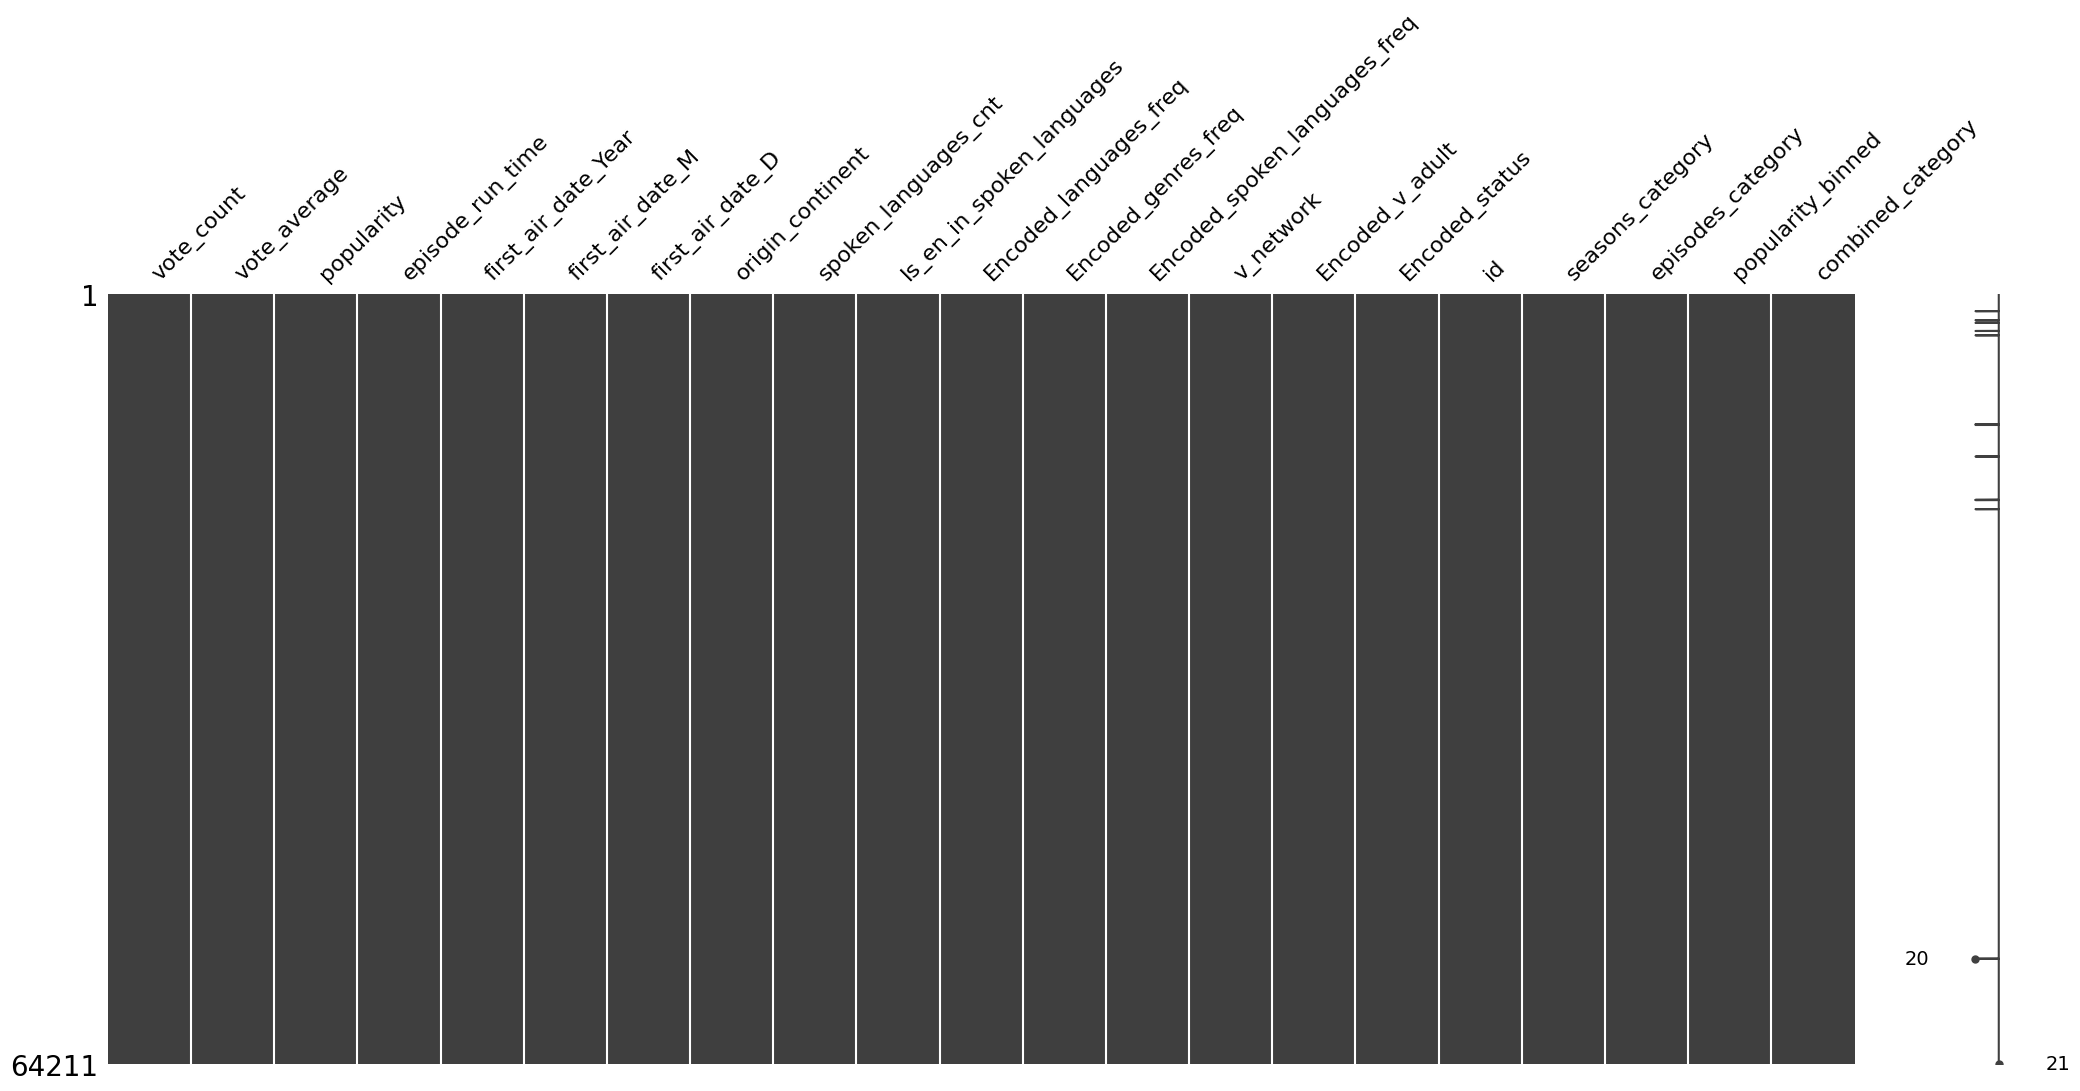

In [323]:
import missingno as msno
msno.matrix(dfload)

In [324]:
# It is more accurate to sue one hot instead of labeling for such district numeric when order is not important
#However due to resource limitations i use the labeling - consider later on to convert  it to target labeling

# looking on the table  on discrite values ensure me that this should be category (limit with upper limit)
dfload['combined_category'] = dfload['combined_category'].astype('category')
dfload['Encoded_v_adult'] = dfload['Encoded_v_adult'].astype('category')
dfload['Encoded_spoken_languages_freq'] = dfload['Encoded_spoken_languages_freq'].astype('category')
dfload['Encoded_genres_freq'] = dfload['Encoded_genres_freq'].astype('category')
dfload['Encoded_languages_freq'] = dfload['Encoded_languages_freq'].astype('category')


#Convert the 'spoken_languages_cnt' column to 'category' type
dfload['spoken_languages_cnt'] = dfload['spoken_languages_cnt'].astype('category')

# those can be analyzed via time series - yet not learned it so usng it as category
dfload['first_air_date_Year'] = dfload['first_air_date_Year'].astype('category')
dfload['first_air_date_M'] = dfload['first_air_date_M'].astype('category')
dfload['first_air_date_D'] = dfload['first_air_date_D'].astype('category')


# # Rename the column to add the 'Encoded ' prefix
dfload.rename(columns={'spoken_languages_cnt': 'Encoded_spoken_languages_cnt'}, inplace=True)

dfload.rename(columns={'first_air_date_Year': 'Encoded_first_air_date_Year'}, inplace=True)
dfload.rename(columns={'first_air_date_M': 'Encoded_first_air_date_M'}, inplace=True)
dfload.rename(columns={'first_air_date_D': 'Encoded_first_air_date_D'}, inplace=True)


dfload.rename(columns={'popularity_binned': 'Encoded_popularity_binned'}, inplace=True)




In [325]:
dfload

,vote_count,vote_average,popularity,episode_run_time,Encoded_first_air_date_Year,Encoded_first_air_date_M,Encoded_first_air_date_D,origin_continent,Encoded_spoken_languages_cnt,Is_en_in_spoken_languages,...,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_v_adult,Encoded_status,id,seasons_category,episodes_category,Encoded_popularity_binned,combined_category
1,17836.0,8.0,96.0,70.0,2017,5,2,2,1.0,False,...,985,5178,2,0,0,71446,3-10,10-50,0-612,3-10 & 10-50
2,16161.0,9.0,186.0,0.0,2016,7,15,3,1.0,True,...,110,73268,2,0,1,66732,3-10,10-50,0-612,3-10 & 10-50
4,13870.0,8.0,417.0,45.0,2016,1,25,3,1.0,True,...,14,73268,2,0,0,63174,3-10,50-100,0-612,3-10 & 50-100
5,13180.0,8.0,144.0,45.0,2017,1,26,3,1.0,True,...,409,73268,4,0,0,69050,3-10,100-500,0-612,3-10 & 100-500
6,13053.0,8.0,116.0,0.0,2021,9,17,5,3.0,True,...,38,1,2,0,1,93405,1-3,0-10,0-612,1-3 & 0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,0.0,0.0,4.0,0.0,2023,11,20,5,1.0,False,...,16282,1405,4,0,1,240293,1-3,10-50,0-612,1-3 & 10-50
168633,0.0,0.0,3.0,0.0,2023,11,30,2,1.0,False,...,25,7377,4,0,1,240693,1-3,0-10,0-612,1-3 & 0-10
168634,0.0,0.0,1.0,0.0,2023,3,3,5,1.0,False,...,68926,14181,4,0,1,239099,1-3,0-10,0-612,1-3 & 0-10
168636,0.0,0.0,2.0,0.0,2023,11,30,5,1.0,False,...,1037,195,4,0,1,240696,1-3,0-10,0-612,1-3 & 0-10


In [326]:
dfload.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     64211 non-null  float64 
 1   vote_average                   64211 non-null  float64 
 2   popularity                     64211 non-null  float64 
 3   episode_run_time               64211 non-null  float64 
 4   Encoded_first_air_date_Year    64211 non-null  category
 5   Encoded_first_air_date_M       64211 non-null  category
 6   Encoded_first_air_date_D       64211 non-null  category
 7   origin_continent               64211 non-null  int8    
 8   Encoded_spoken_languages_cnt   64211 non-null  category
 9   Is_en_in_spoken_languages      64211 non-null  category
 10  Encoded_languages_freq         64211 non-null  category
 11  Encoded_genres_freq            64211 non-null  category
 12  Encoded_spoken_languages_freq  

In [327]:
# 1 Outlier remove

# Selecting only numeric continuous columns (excluding categorical and discrete)
# In most cases, continuous variables are numeric and float types
continuous_df = dfload.select_dtypes(include=['float64', 'int64'])
continuous_df = continuous_df.astype({col: 'float64' for col in continuous_df.select_dtypes(include='int64').columns})

# Display the small dataset with only numeric continuous data
continuous_df
continuous_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vote_count        64211 non-null  float64
 1   vote_average      64211 non-null  float64
 2   popularity        64211 non-null  float64
 3   episode_run_time  64211 non-null  float64
 4   id                64211 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


<Axes: ylabel='popularity'>

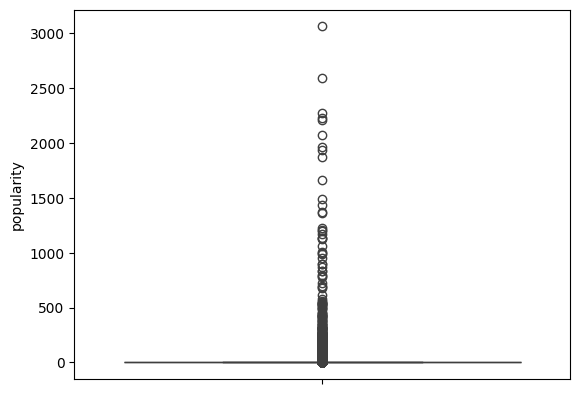

In [328]:
sns.boxplot(dfload['popularity'])

<Axes: >

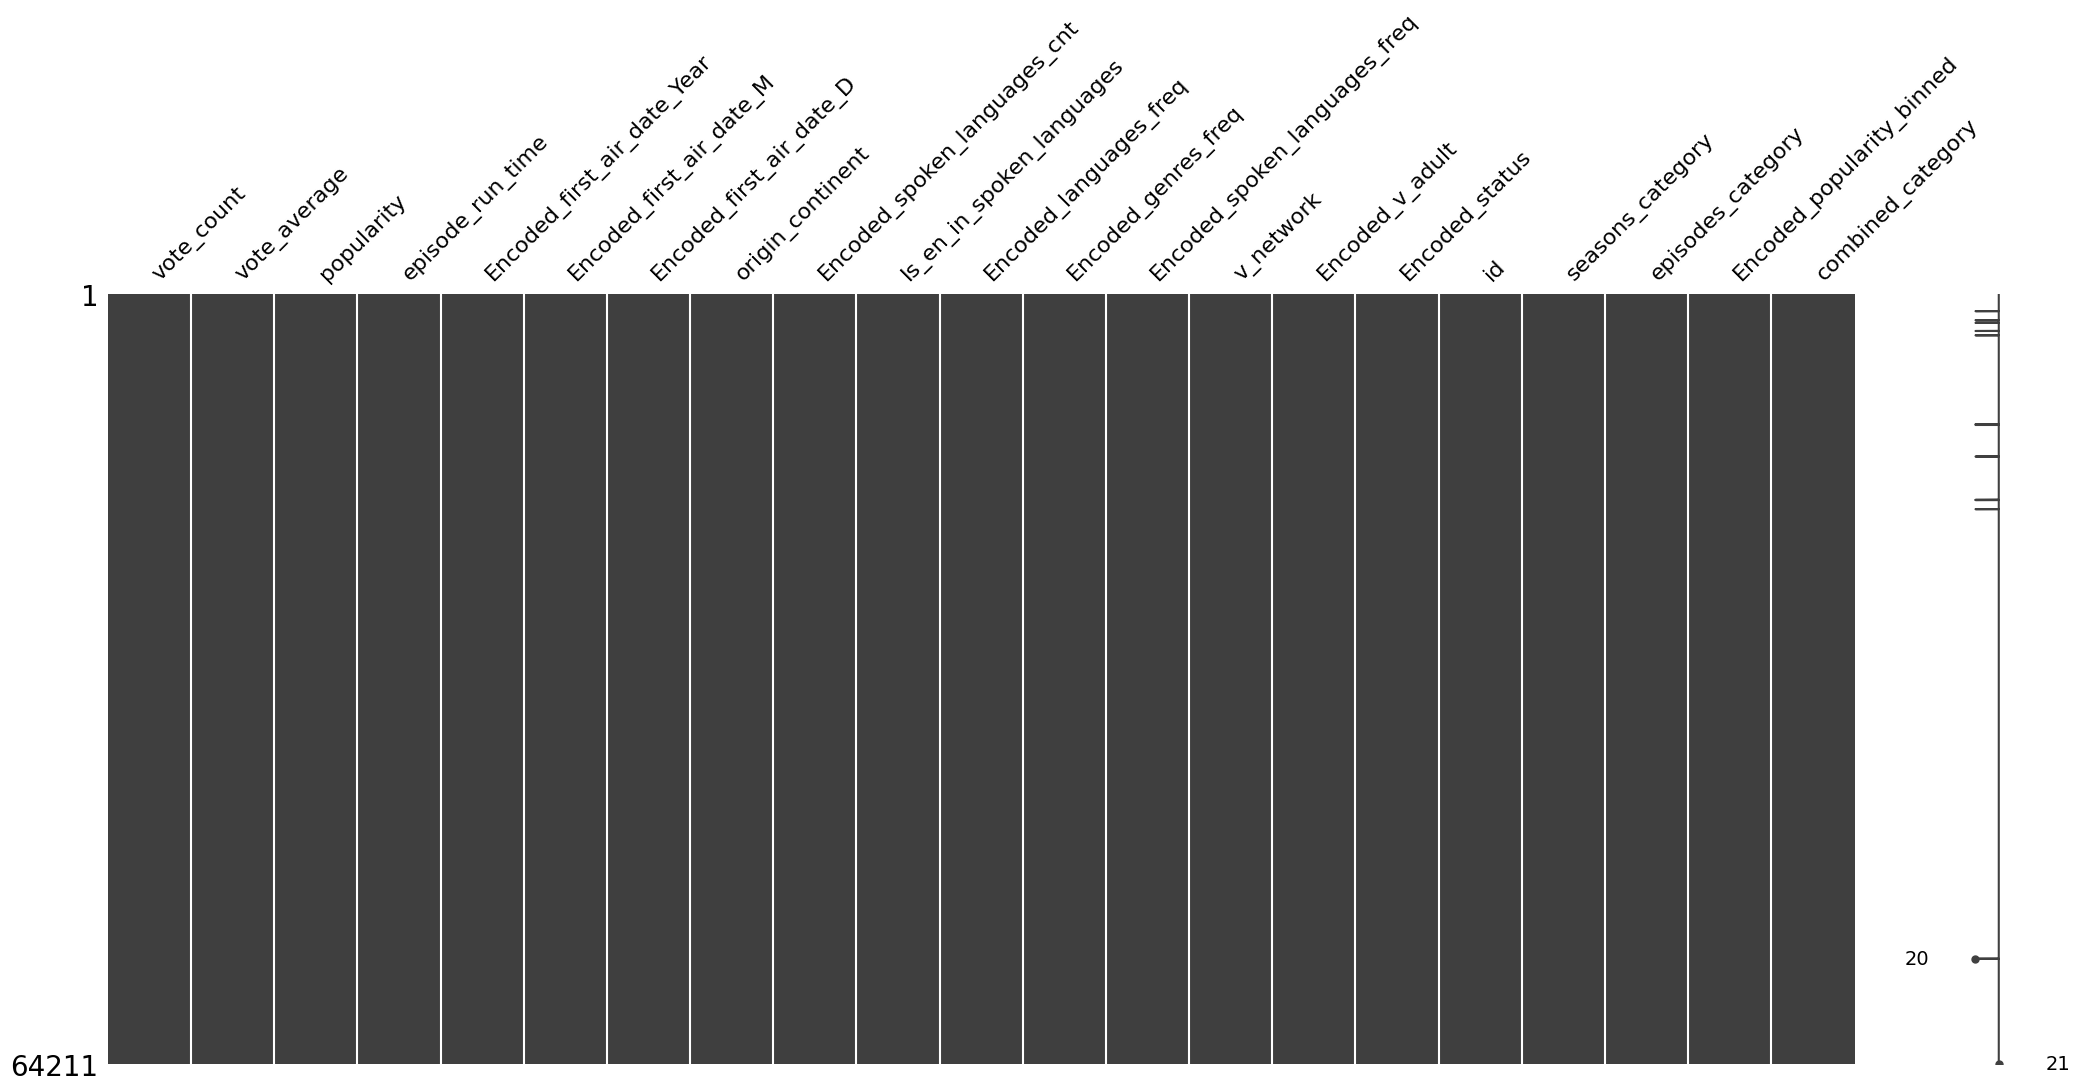

In [329]:
import missingno as msno
msno.matrix(dfload)

C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject310-5HI4FQov-py3.10\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='popularity'>

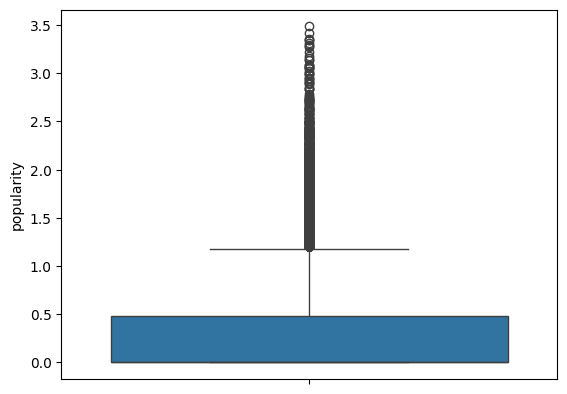

In [330]:
target_pop_log=np.log10(dfload['popularity'])
sns.boxplot(target_pop_log)

In [331]:
# Filter rows where 'popularity' is zero, negative, or NaN
filtered_df = dfload[(dfload['popularity'] <= 0) | dfload['popularity'].isna()]
print(filtered_df['popularity'].value_counts())

1/(len(dfload)/len(filtered_df))

0.0    847
Name: popularity, dtype: int64


0.013190886296740435

In [332]:
epsilon=1e-10

#Filter rows where 'popularity' is zero, negative, or NaN
filtered_df = continuous_df[(continuous_df['popularity'] <= epsilon) | continuous_df['popularity'].isna()]

# Check value counts in the filtered DataFrame
filtered_value_counts = filtered_df['popularity'].value_counts()
print(filtered_value_counts)

0.0    847
Name: popularity, dtype: int64


<Axes: >

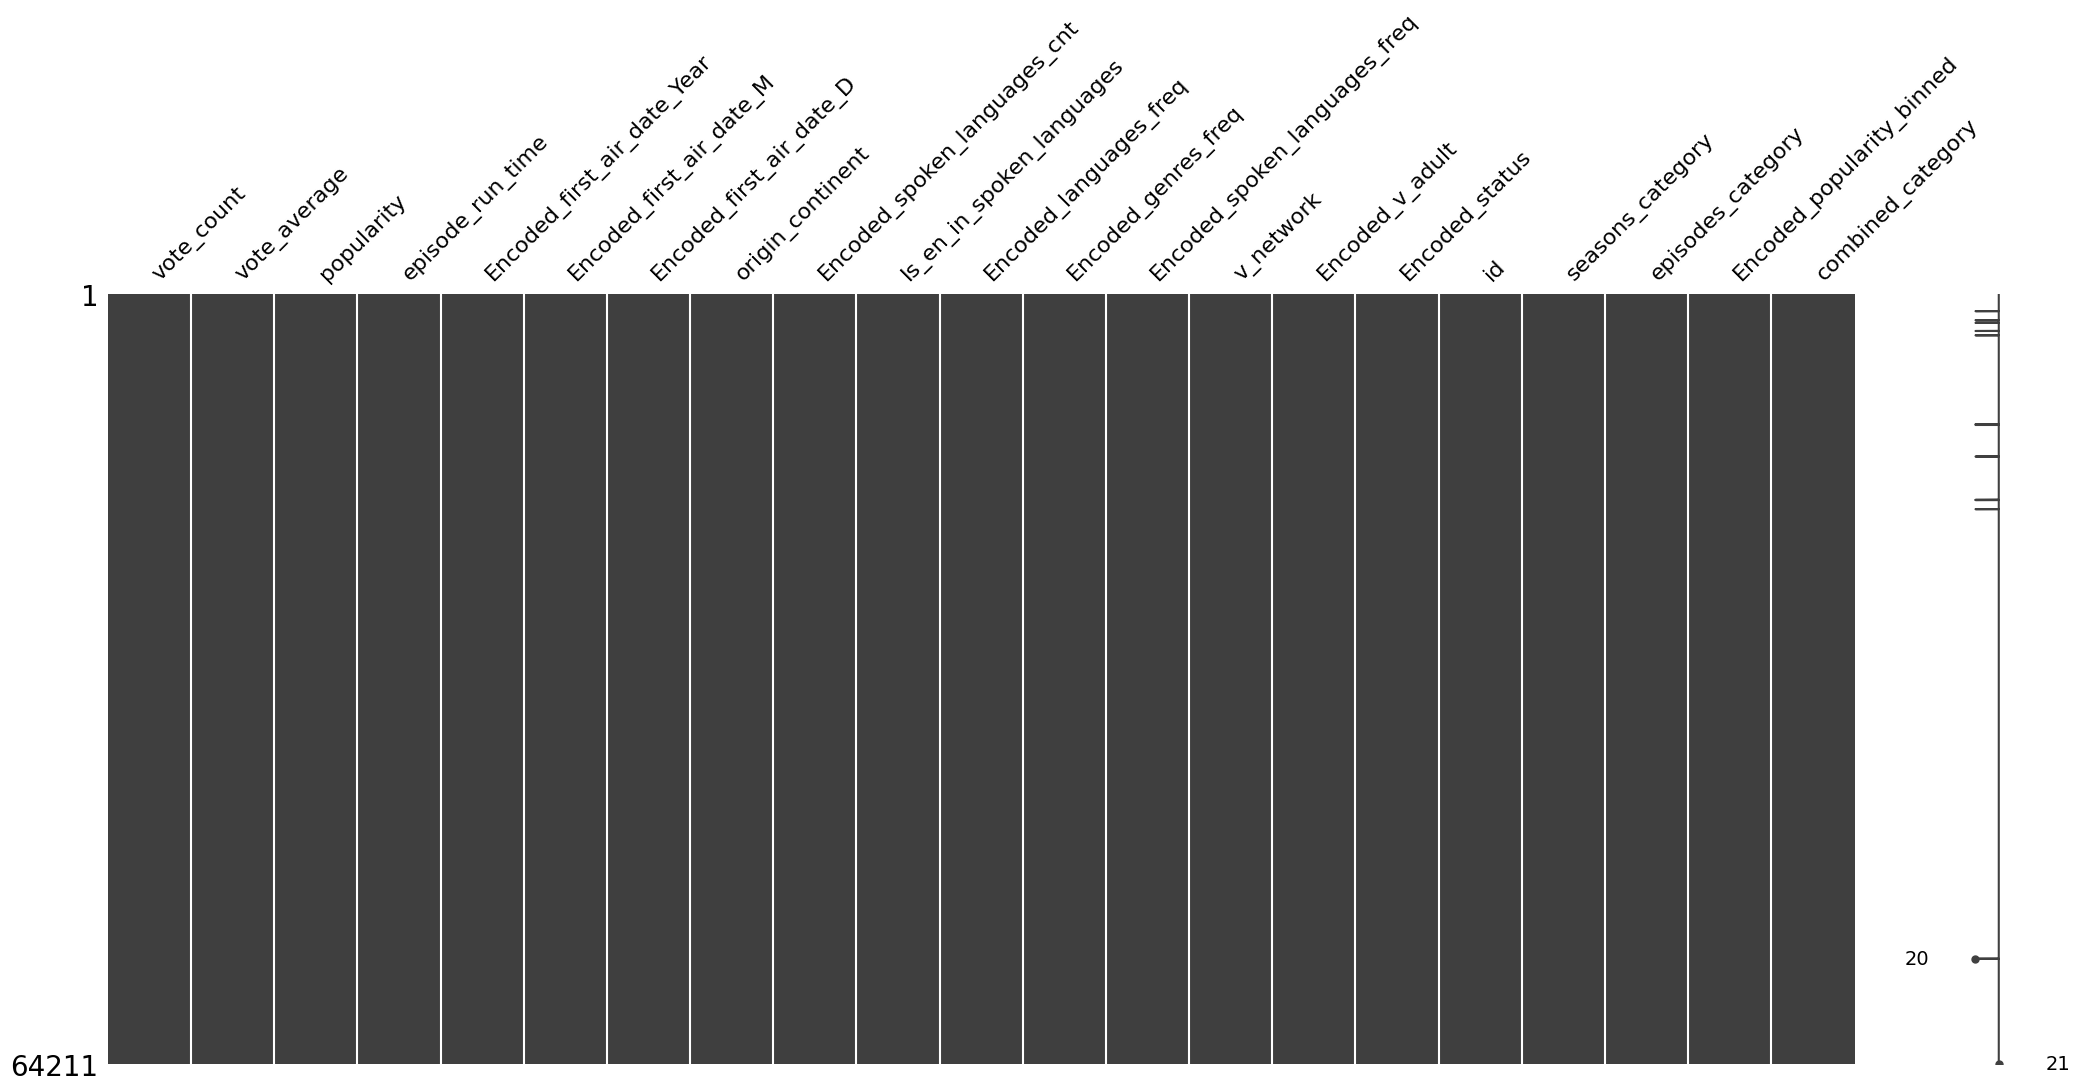

In [333]:
import missingno as msno
msno.matrix(dfload)


<Axes: >

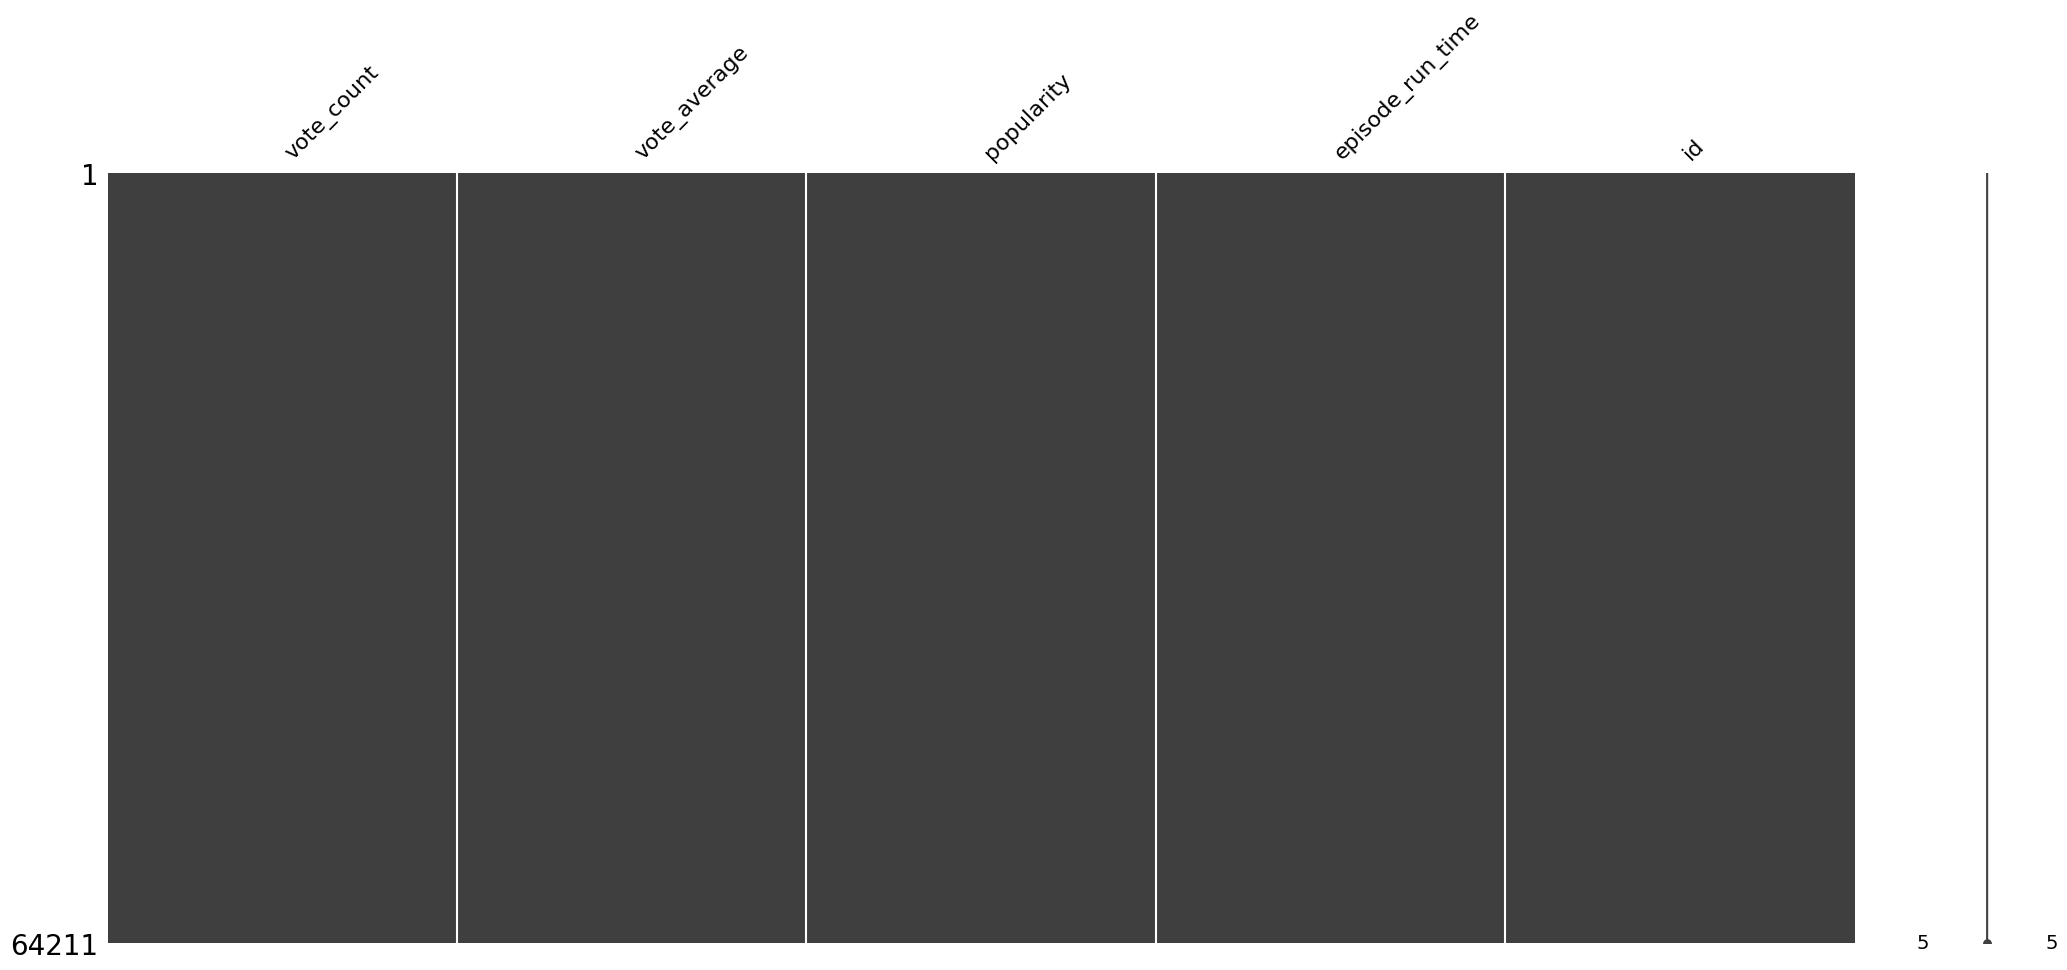

In [334]:
import missingno as msno
msno.matrix(continuous_df)

In [335]:

# Apply the function to each column and recheck
print("$$$$- Apply the function ")
recheck_and_print(continuous_df)


print("$$$$- Recheck cycle ")

# Apply the function to each column and recheck
recheck_and_print(continuous_df)






$$$$- Apply the function 
Column: vote_count
  Zeros treated: 38385
  Negatives treated: 0
  NaNs: 0

Column: vote_average
  Zeros treated: 38408
  Negatives treated: 0
  NaNs: 0

Column: popularity
  Zeros treated: 847
  Negatives treated: 0
  NaNs: 0

Column: episode_run_time
  Zeros treated: 33212
  Negatives treated: 0
  NaNs: 0

Column: id
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

$$$$- Recheck cycle 
Column: vote_count
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: vote_average
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: popularity
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: episode_run_time
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: id
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0



<Axes: >

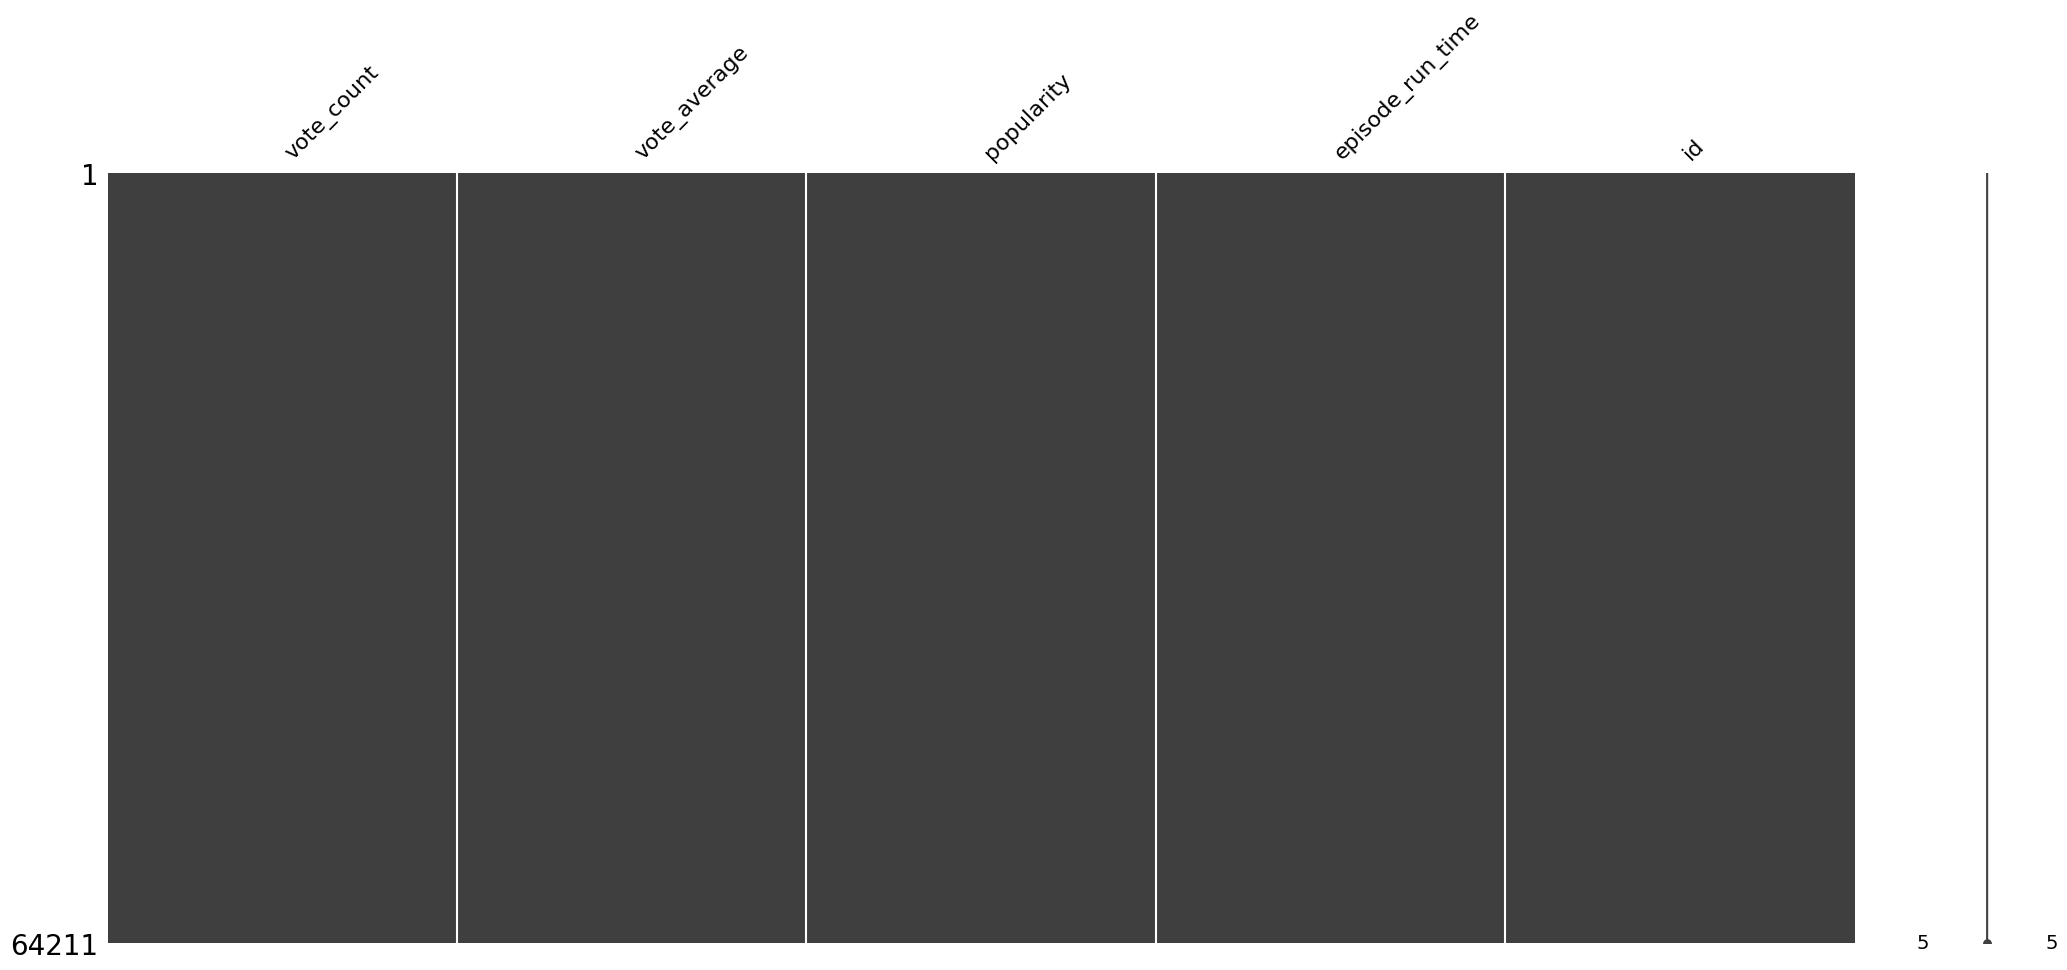

In [336]:
import missingno as msno
msno.matrix(continuous_df)   # based on whether data is missing (NaN) or present.

<Axes: ylabel='popularity'>

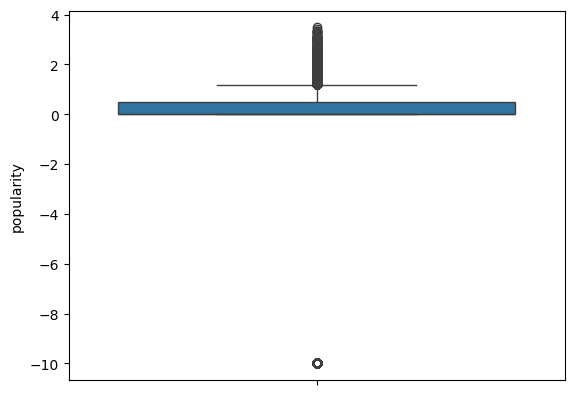

In [337]:
#Perform  log on continues 
continuous_df_log=np.log10(continuous_df)
sns.boxplot(continuous_df_log['popularity'])

In [338]:
problematic_col = 'Encoded_v_adult'  # Replace with the actual column name

# Check data type
print(f"Data type of {problematic_col}: {dfload[problematic_col].dtype}")

# Summary statistics
print(dfload[problematic_col].describe())

# Check for missing values
print(f"Missing values in {problematic_col}: {dfload[problematic_col].isna().sum()}")

# Display first few rows
print(dfload[problematic_col].head(10))

Data type of Encoded_v_adult: category
count     64211
unique        2
top           0
freq      61286
Name: Encoded_v_adult, dtype: int64
Missing values in Encoded_v_adult: 0
1     0
2     0
4     0
5     0
6     0
8     0
9     0
12    0
14    0
16    1
Name: Encoded_v_adult, dtype: category
Categories (2, int64): [0, 1]


In [339]:
# Create a DataFrame with data types and unique values count
info_df = pd.DataFrame({
    'Column': dfload.columns,
    'Data Type': [dfload[col].dtype for col in dfload.columns],
    'Unique Values': [dfload[col].nunique() for col in dfload.columns],
     'Unique Values List': [dfload[col].unique().tolist() if dfload[col].nunique() < 20 else None for col in dfload.columns  ]
    
    
})

# Print the table
(info_df)

,Column,Data Type,Unique Values,Unique Values List
0,vote_count,float64,740,None
1,vote_average,float64,11,"[8.0, 9.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 10.0,..."
2,popularity,float64,303,None
3,episode_run_time,float64,282,None
4,Encoded_first_air_date_Year,category,8,"[2017, 2016, 2021, 2019, 2018, 2022, 2020, 2023]"
5,Encoded_first_air_date_M,category,12,"[5, 7, 1, 9, 6, 11, 2, 10, 3, 12, 4, 8]"
6,Encoded_first_air_date_D,category,31,None
7,origin_continent,int8,6,"[2, 3, 5, 4, 1, 0]"
8,Encoded_spoken_languages_cnt,category,11,"[1.0, 3.0, 4.0, 2.0, 8.0, 10.0, 5.0, 7.0, 6.0,..."
9,Is_en_in_spoken_languages,category,2,"[False, True]"


In [340]:
# Function to identify and treat outliers using IQR
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:  
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)        
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
        

    ## Count the number of `1`s in each column
    count_per_column = df_outliers.apply(lambda x: (x == 1).sum())
    
    # Print the count for each column
    print("Count of `1`s per column:")
    print(count_per_column)
    
    # Sum of counts across all columns
    total_count = count_per_column.sum()
    
    #Print the count for all columns
    print("total_count of `1`s of all columns:")
    print(total_count)
                   
    return df_outliers


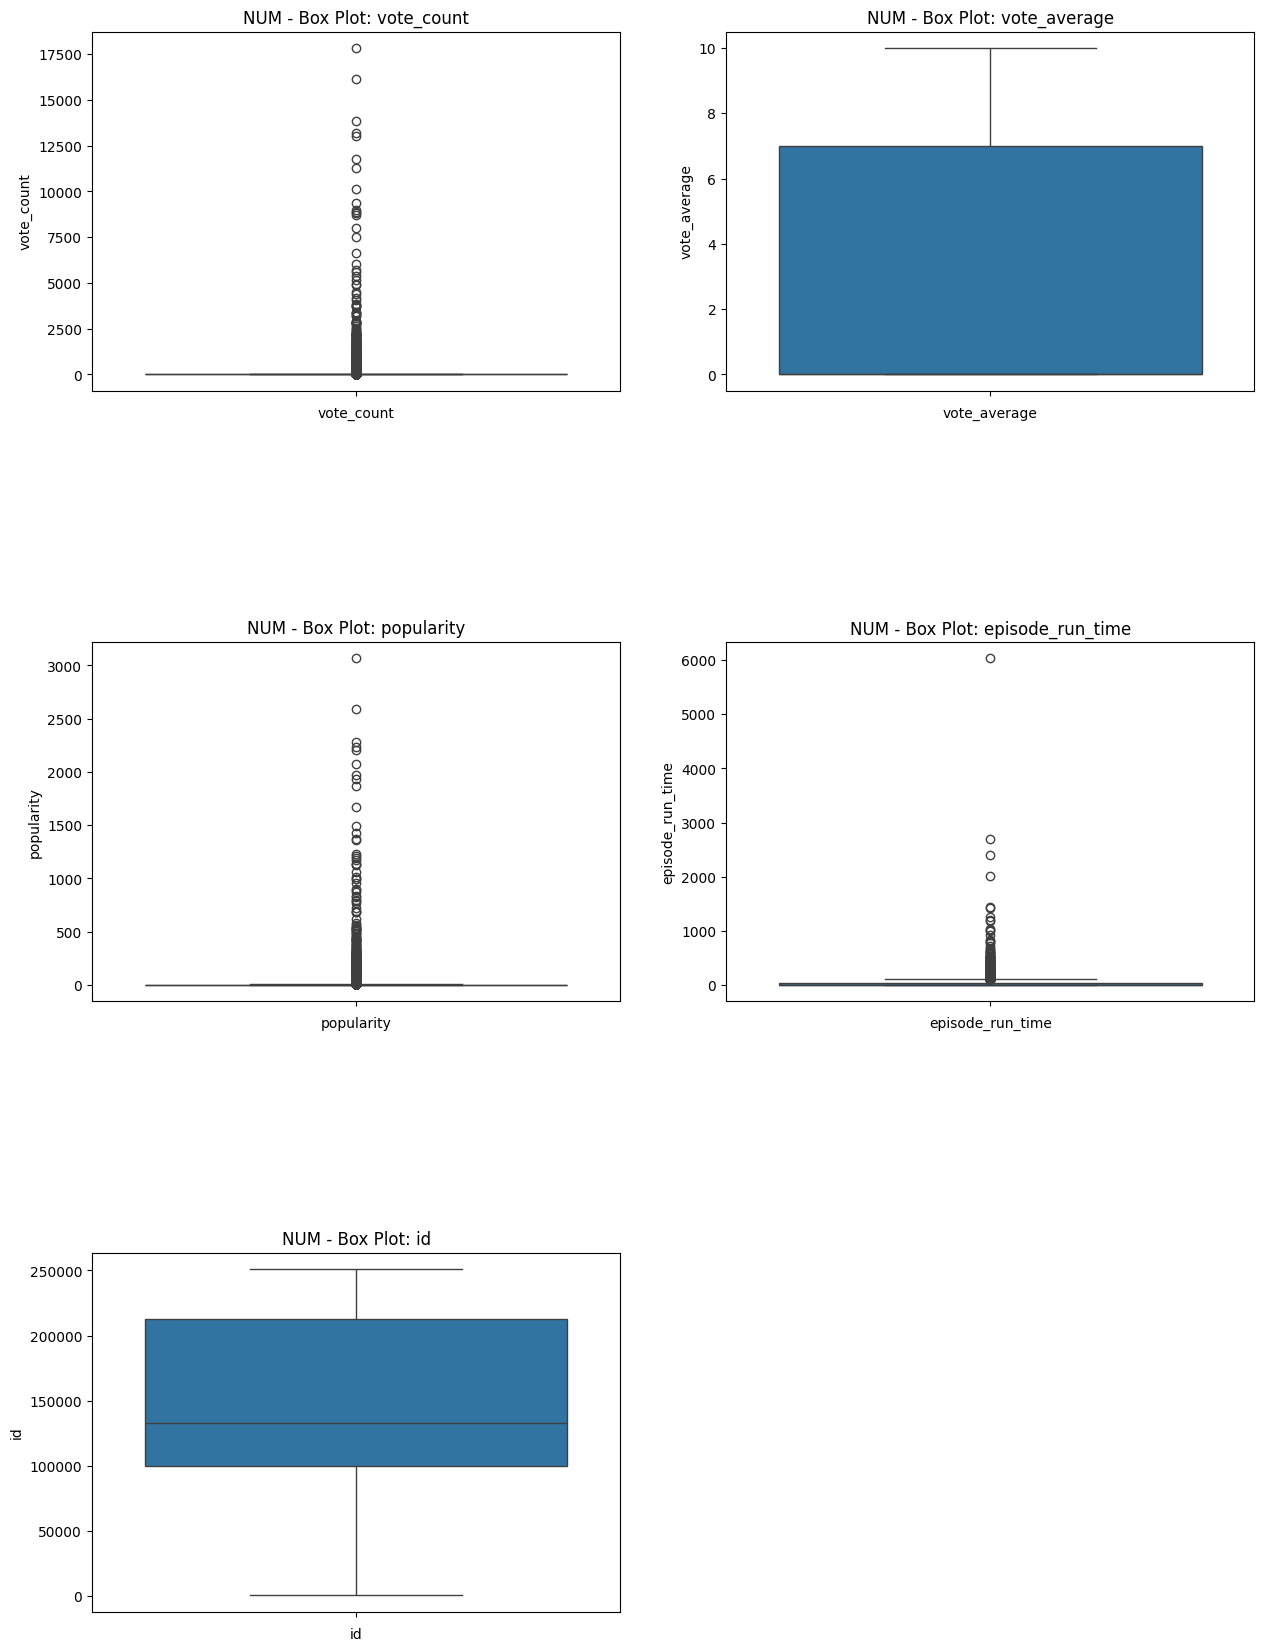

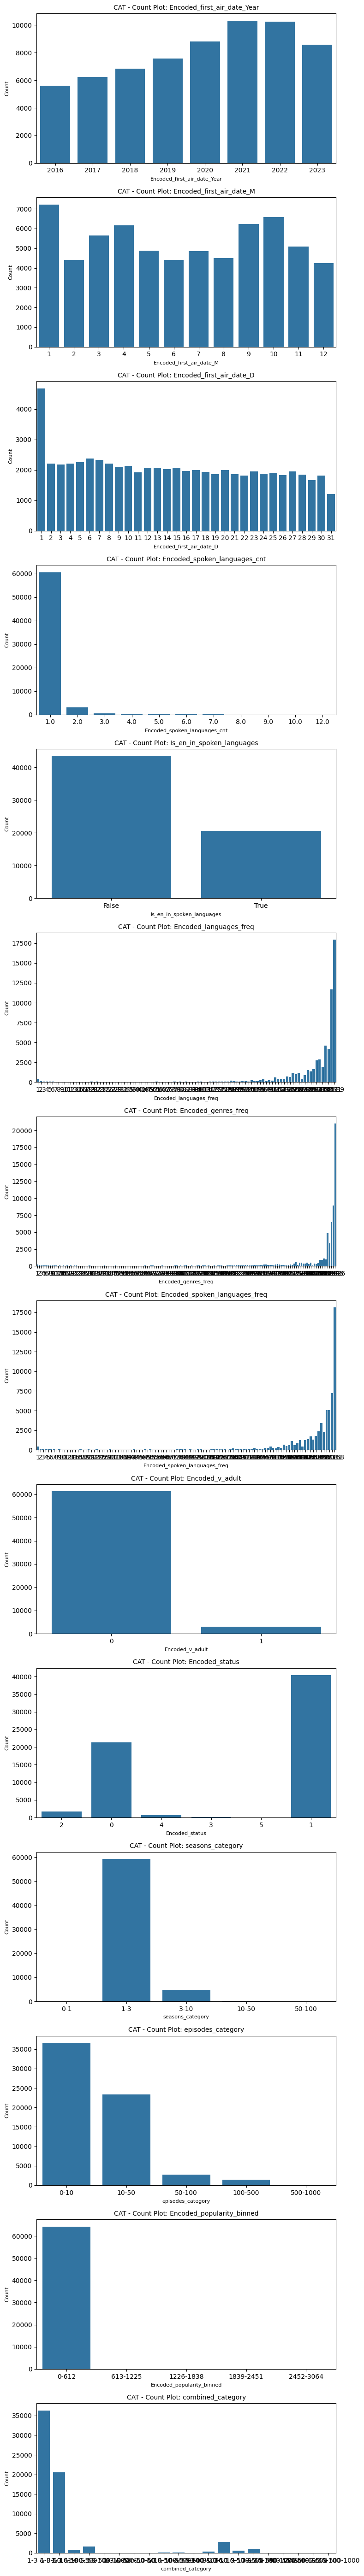

In [341]:
outliers_boxplot(dfload)


In [342]:
# Only on 3 plots on the regular plot i can see outliers: Vote_Count, poplarity, episode run time 
# below in LOg plot we cant see it.

Encoded feature shows the mean but there are no Outliers - nominal discrete
NUM means continues numeric.


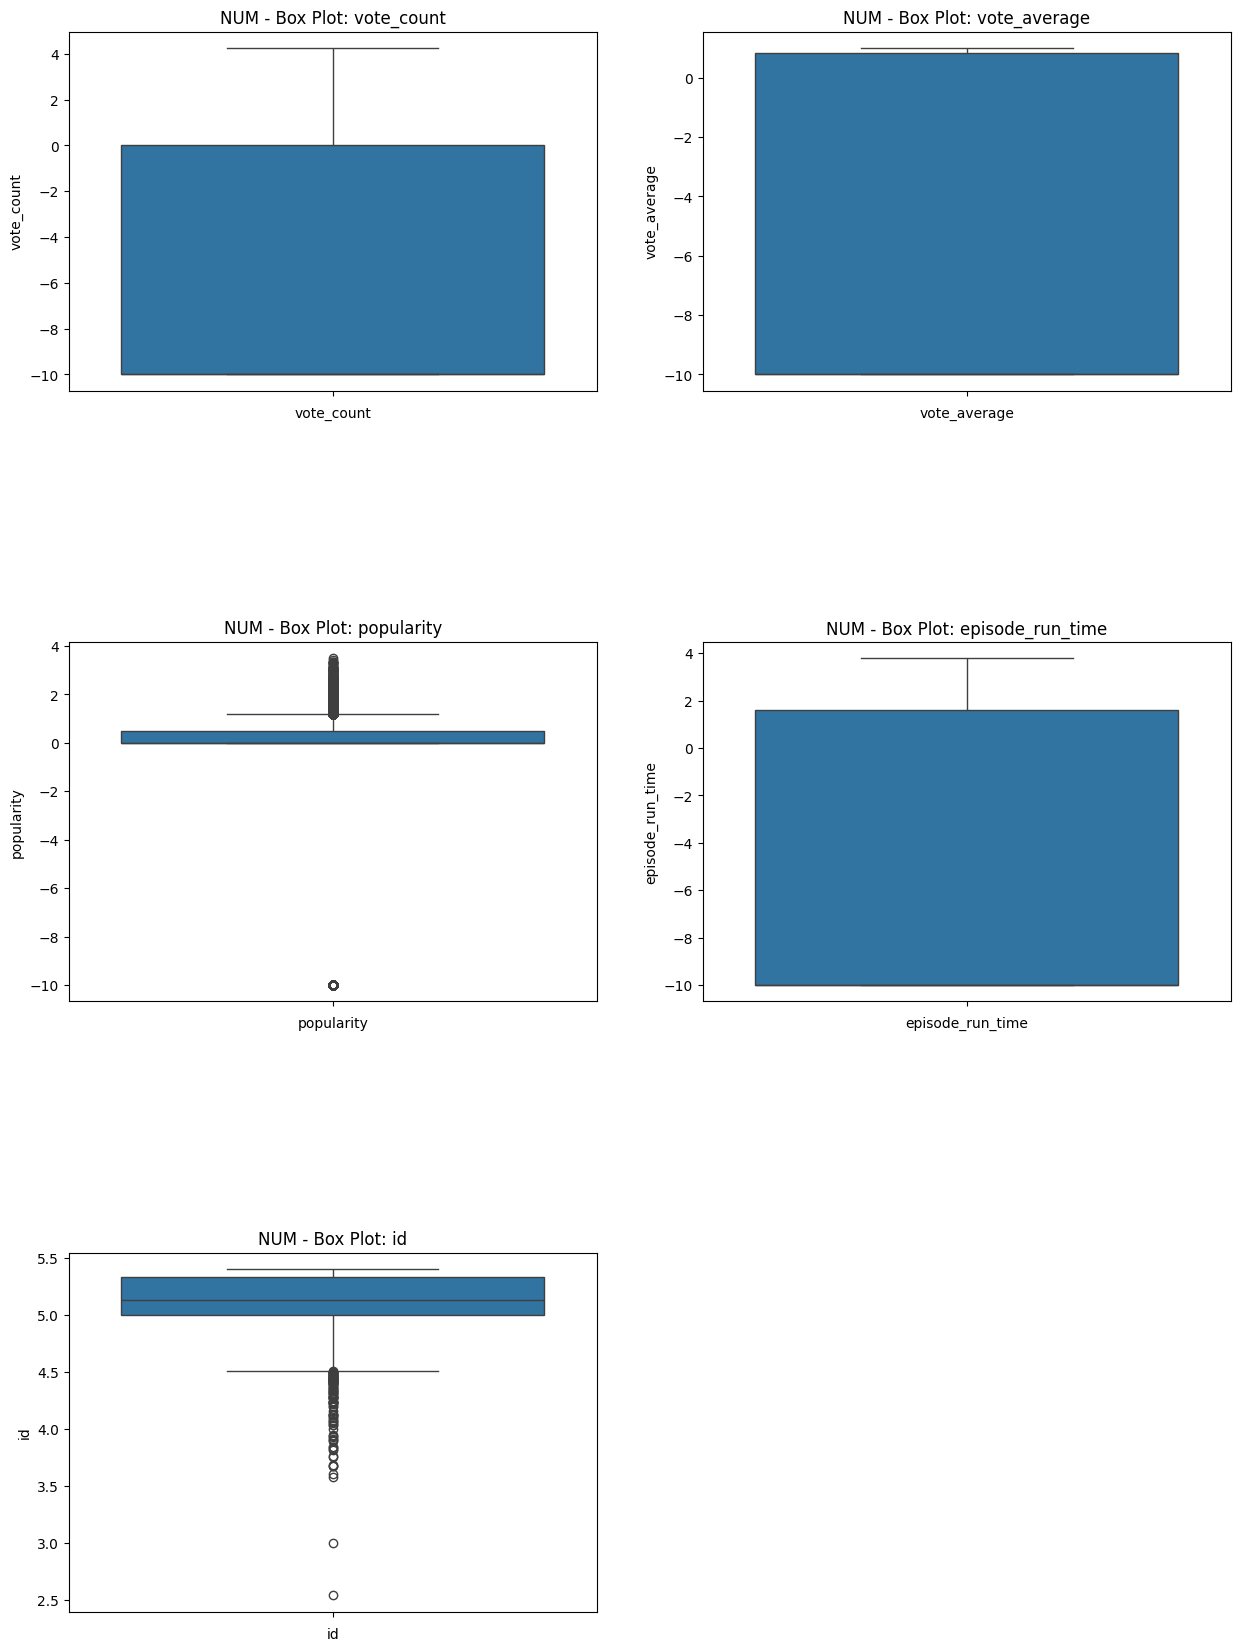

In [343]:
# Example usage with your DataFrame
outliers_boxplot(continuous_df_log)
print('Encoded feature shows the mean but there are no Outliers - nominal discrete')
print('NUM means continues numeric.')

<Axes: >

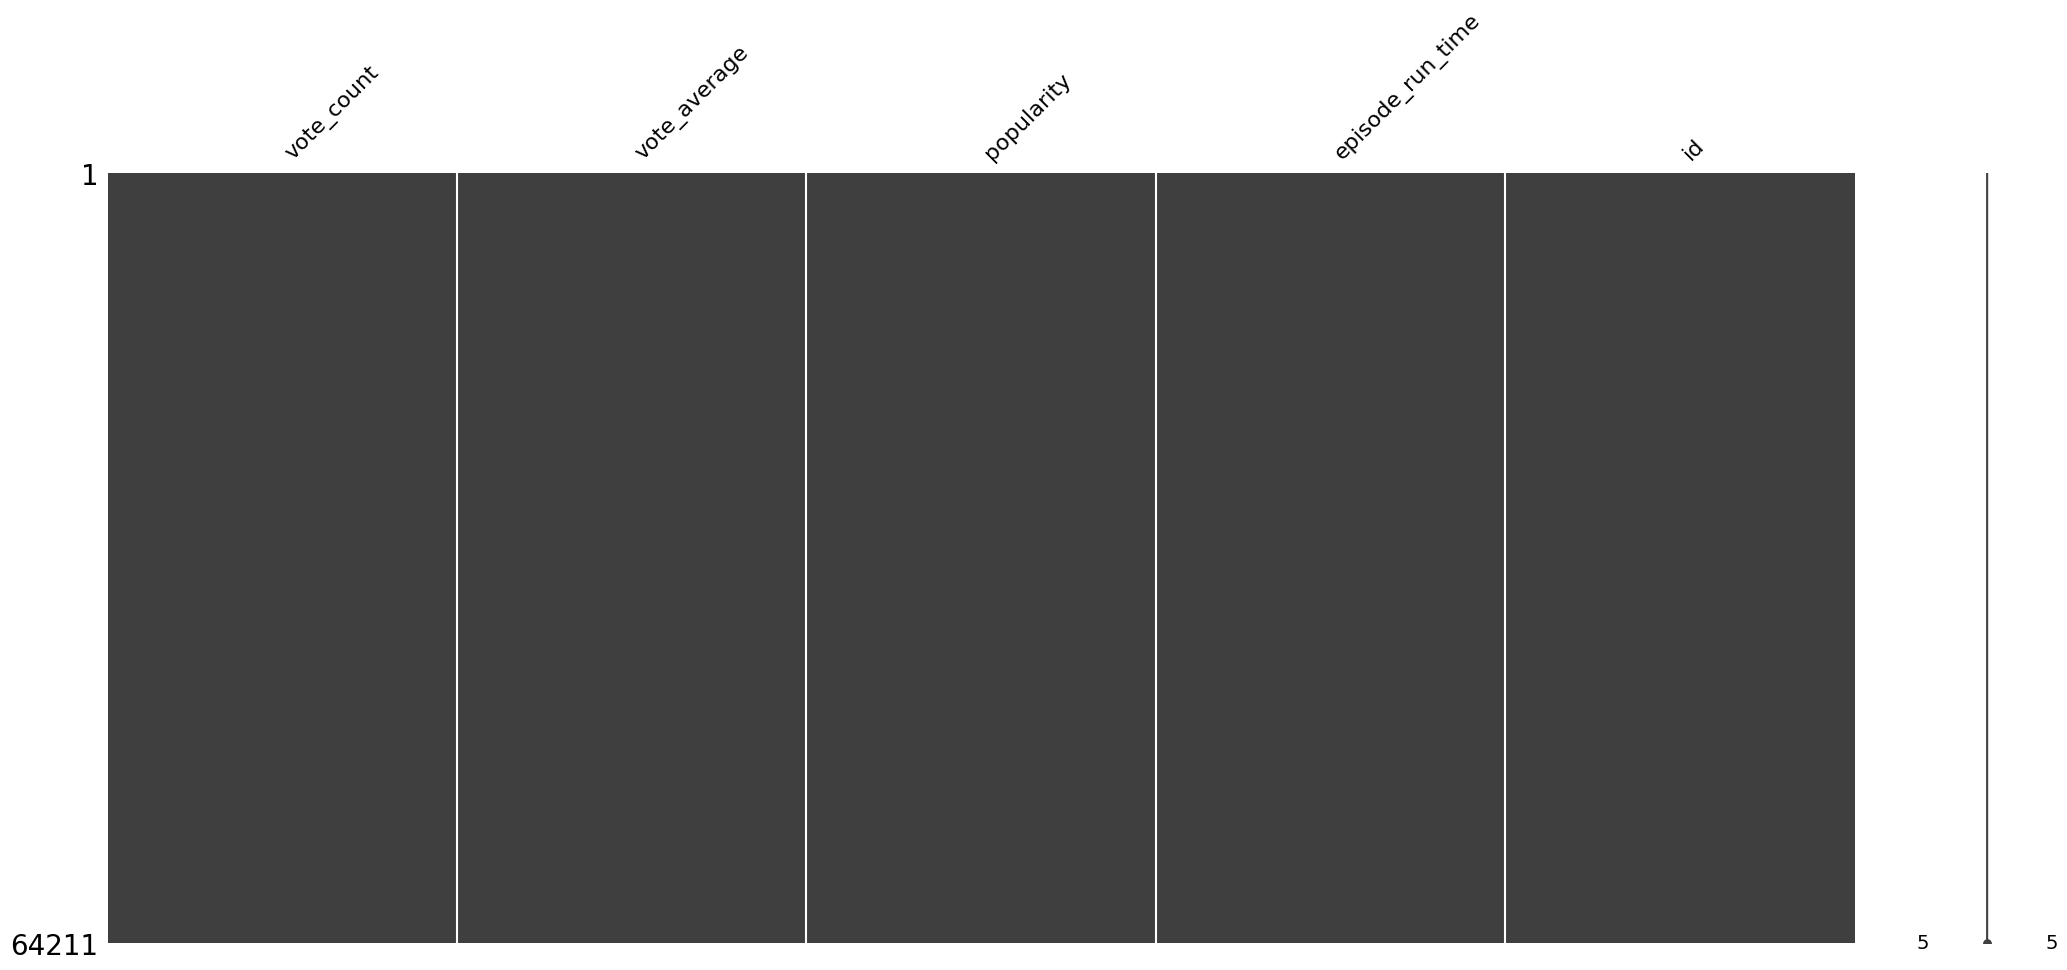

In [344]:
import missingno as msno
msno.matrix(continuous_df)   # based on whether data is missing (NaN) or present.

In [345]:
# Apply the outlier treatment function to numeric columns
outliers_df = treat_outliers(dfload, continuous_df_log)

# ihave outlier count on each column but only such outlier cell  that doesnt change the correlation but does chnage the distribution.
# as a whole outlier when removed  sharpe the distribution to such that is more normal sa it was with the outlier, based that also co doest change if it removed so it doest creat harm.
# 1 is flag for possible outlier

Count of `1`s per column:
vote_count          12177
vote_average            0
popularity           8069
episode_run_time      960
id                      0
dtype: int64
total_count of `1`s of all columns:
21206


In [346]:
continuous_df_log.columns



Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time', 'id'], dtype='object')

In [347]:
continuous_df.columns


Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time', 'id'], dtype='object')

In [348]:
outliers_df.columns


Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time', 'id'], dtype='object')

In [349]:
# # Checking distribution and correlation changes
# #Creating a table for outliers change
# out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
# out_df

In [350]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   vote_count        64211 non-null  int32
 1   vote_average      64211 non-null  int32
 2   popularity        64211 non-null  int32
 3   episode_run_time  64211 non-null  int32
 4   id                64211 non-null  int32
dtypes: int32(5)
memory usage: 1.7 MB


In [351]:
dfload.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     64211 non-null  float64 
 1   vote_average                   64211 non-null  float64 
 2   popularity                     64211 non-null  float64 
 3   episode_run_time               64211 non-null  float64 
 4   Encoded_first_air_date_Year    64211 non-null  category
 5   Encoded_first_air_date_M       64211 non-null  category
 6   Encoded_first_air_date_D       64211 non-null  category
 7   origin_continent               64211 non-null  int8    
 8   Encoded_spoken_languages_cnt   64211 non-null  category
 9   Is_en_in_spoken_languages      64211 non-null  category
 10  Encoded_languages_freq         64211 non-null  category
 11  Encoded_genres_freq            64211 non-null  category
 12  Encoded_spoken_languages_freq  

In [352]:
continuous_df_log.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vote_count        64211 non-null  float64
 1   vote_average      64211 non-null  float64
 2   popularity        64211 non-null  float64
 3   episode_run_time  64211 non-null  float64
 4   id                64211 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


In [353]:
# Checking distribution and correlation changes
# for col in continuous_df_log:
#     out = dfload[col]
#     non_out = dfload[col][outliers_df[col] == 0]
#     cor_out = dfload['popularity']
#     cor_non_out = dfload['popularity'][outliers_df[col] == 0]

#     # Filter out NaN values for correlation calculation
#     valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
#     valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)

#     if valid_out.sum() > 1 and valid_non_out.sum() > 1:
#         cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] -
#                                 np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
#     else:
#         cor_change = '-'

#     dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

#     new_row = pd.DataFrame({'feature': [col],
#                             'outliers_cnt': [outliers_df[col].sum()],
#                             'distribution_changed': [dist_change],
#                             'correlation_changed': [cor_change]})

#     out_df = pd.concat([out_df, new_row], ignore_index=True)

In [354]:
# Example usage
# out_df1 = process_outlier_columns_OLD(continuous_df_log, outliers_df)
# out_df1


# Example usage
try:
    features_to_drop, detailed_df = process_outlier_columns(continuous_df_log, outliers_df)
except ValueError as e:
    print(f"ValueError: {e}")


# features_to_drop

In [355]:
detailed_df


,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,vote_count,12177,+,+,no
1,vote_average,0,-,-,no
2,popularity,8069,+,-,yes
3,episode_run_time,960,+,-,yes
4,id,0,-,-,no


In [356]:
features_to_drop

0          popularity
1    episode_run_time
Name: feature, dtype: object

In [357]:
# # Add the 'drop' column based on the specified conditions
# out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')

# # Filter features where only distribution changes but not correlation
# to_drop = out_df[out_df['drop'] == 'yes']['feature']

# # Display the resulting DataFrame
# out_df

<Axes: >

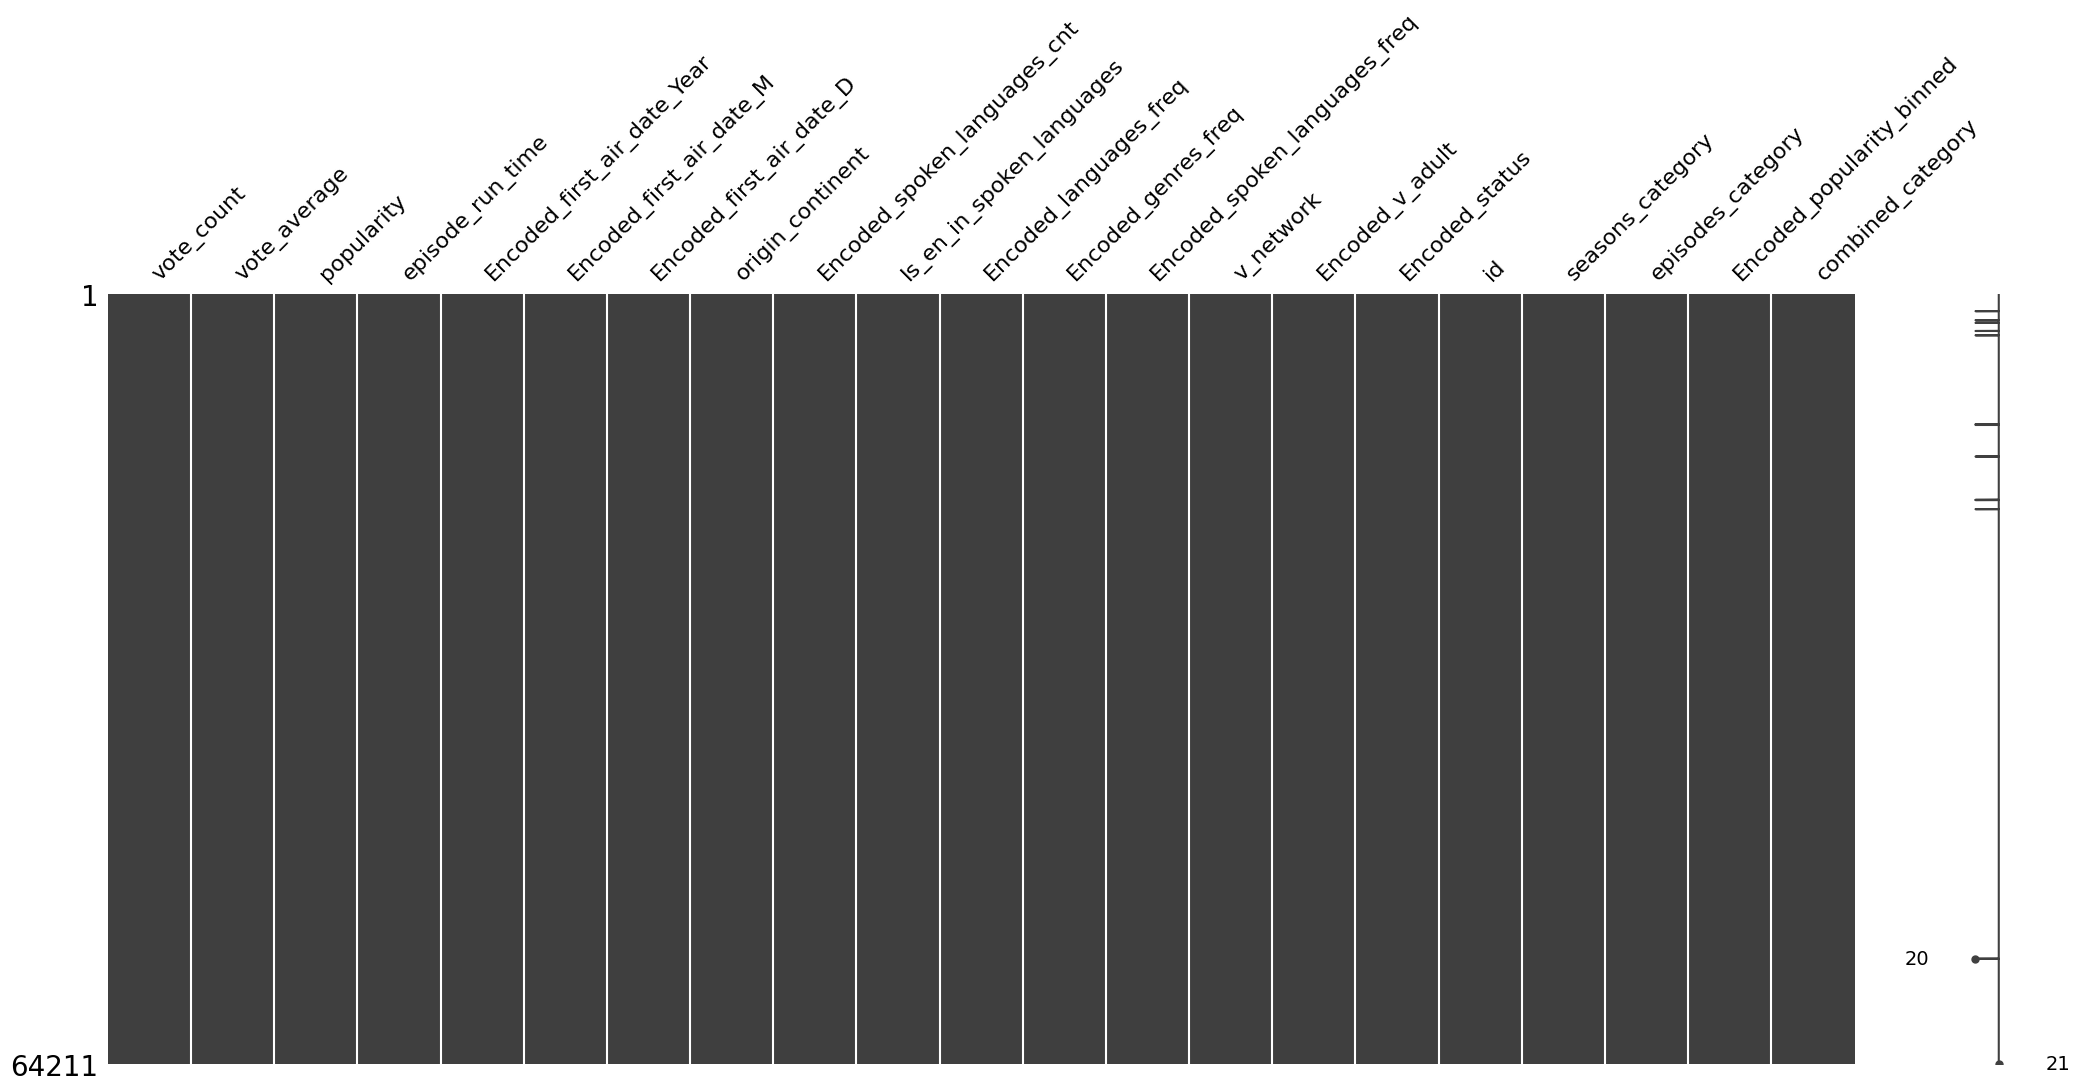

In [358]:
msno.matrix(dfload)

In [359]:
### Look here                            @GGGGGGGGGGGGGYYYYYYYYY

In [360]:
# Remove outliers
#Clean outliers as long a it is not target value popularity
i=0
for col in features_to_drop:
    if col != 'popularity' or col != 'id':  # Check to ensure the column is not 'popularity'
        i+=1
        cntnan = outliers_df[col].sum()
        print(f"remove outlier and implement nan instead for:{col} in dfload count:{cntnan}. process counter{i}" )
        dfload.loc[outliers_df[col] == 1, col] = np.nan

# Display the updated df_cleaned
dfload

remove outlier and implement nan instead for:popularity in dfload count:8069. process counter1
remove outlier and implement nan instead for:episode_run_time in dfload count:960. process counter2


,vote_count,vote_average,popularity,episode_run_time,Encoded_first_air_date_Year,Encoded_first_air_date_M,Encoded_first_air_date_D,origin_continent,Encoded_spoken_languages_cnt,Is_en_in_spoken_languages,...,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_v_adult,Encoded_status,id,seasons_category,episodes_category,Encoded_popularity_binned,combined_category
1,17836.0,8.0,NaN,70.0,2017,5,2,2,1.0,False,...,985,5178,2,0,0,71446,3-10,10-50,0-612,3-10 & 10-50
2,16161.0,9.0,NaN,0.0,2016,7,15,3,1.0,True,...,110,73268,2,0,1,66732,3-10,10-50,0-612,3-10 & 10-50
4,13870.0,8.0,NaN,45.0,2016,1,25,3,1.0,True,...,14,73268,2,0,0,63174,3-10,50-100,0-612,3-10 & 50-100
5,13180.0,8.0,NaN,45.0,2017,1,26,3,1.0,True,...,409,73268,4,0,0,69050,3-10,100-500,0-612,3-10 & 100-500
6,13053.0,8.0,NaN,0.0,2021,9,17,5,3.0,True,...,38,1,2,0,1,93405,1-3,0-10,0-612,1-3 & 0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,0.0,0.0,4.0,0.0,2023,11,20,5,1.0,False,...,16282,1405,4,0,1,240293,1-3,10-50,0-612,1-3 & 10-50
168633,0.0,0.0,3.0,0.0,2023,11,30,2,1.0,False,...,25,7377,4,0,1,240693,1-3,0-10,0-612,1-3 & 0-10
168634,0.0,0.0,1.0,0.0,2023,3,3,5,1.0,False,...,68926,14181,4,0,1,239099,1-3,0-10,0-612,1-3 & 0-10
168636,0.0,0.0,2.0,0.0,2023,11,30,5,1.0,False,...,1037,195,4,0,1,240696,1-3,0-10,0-612,1-3 & 0-10


<Axes: >

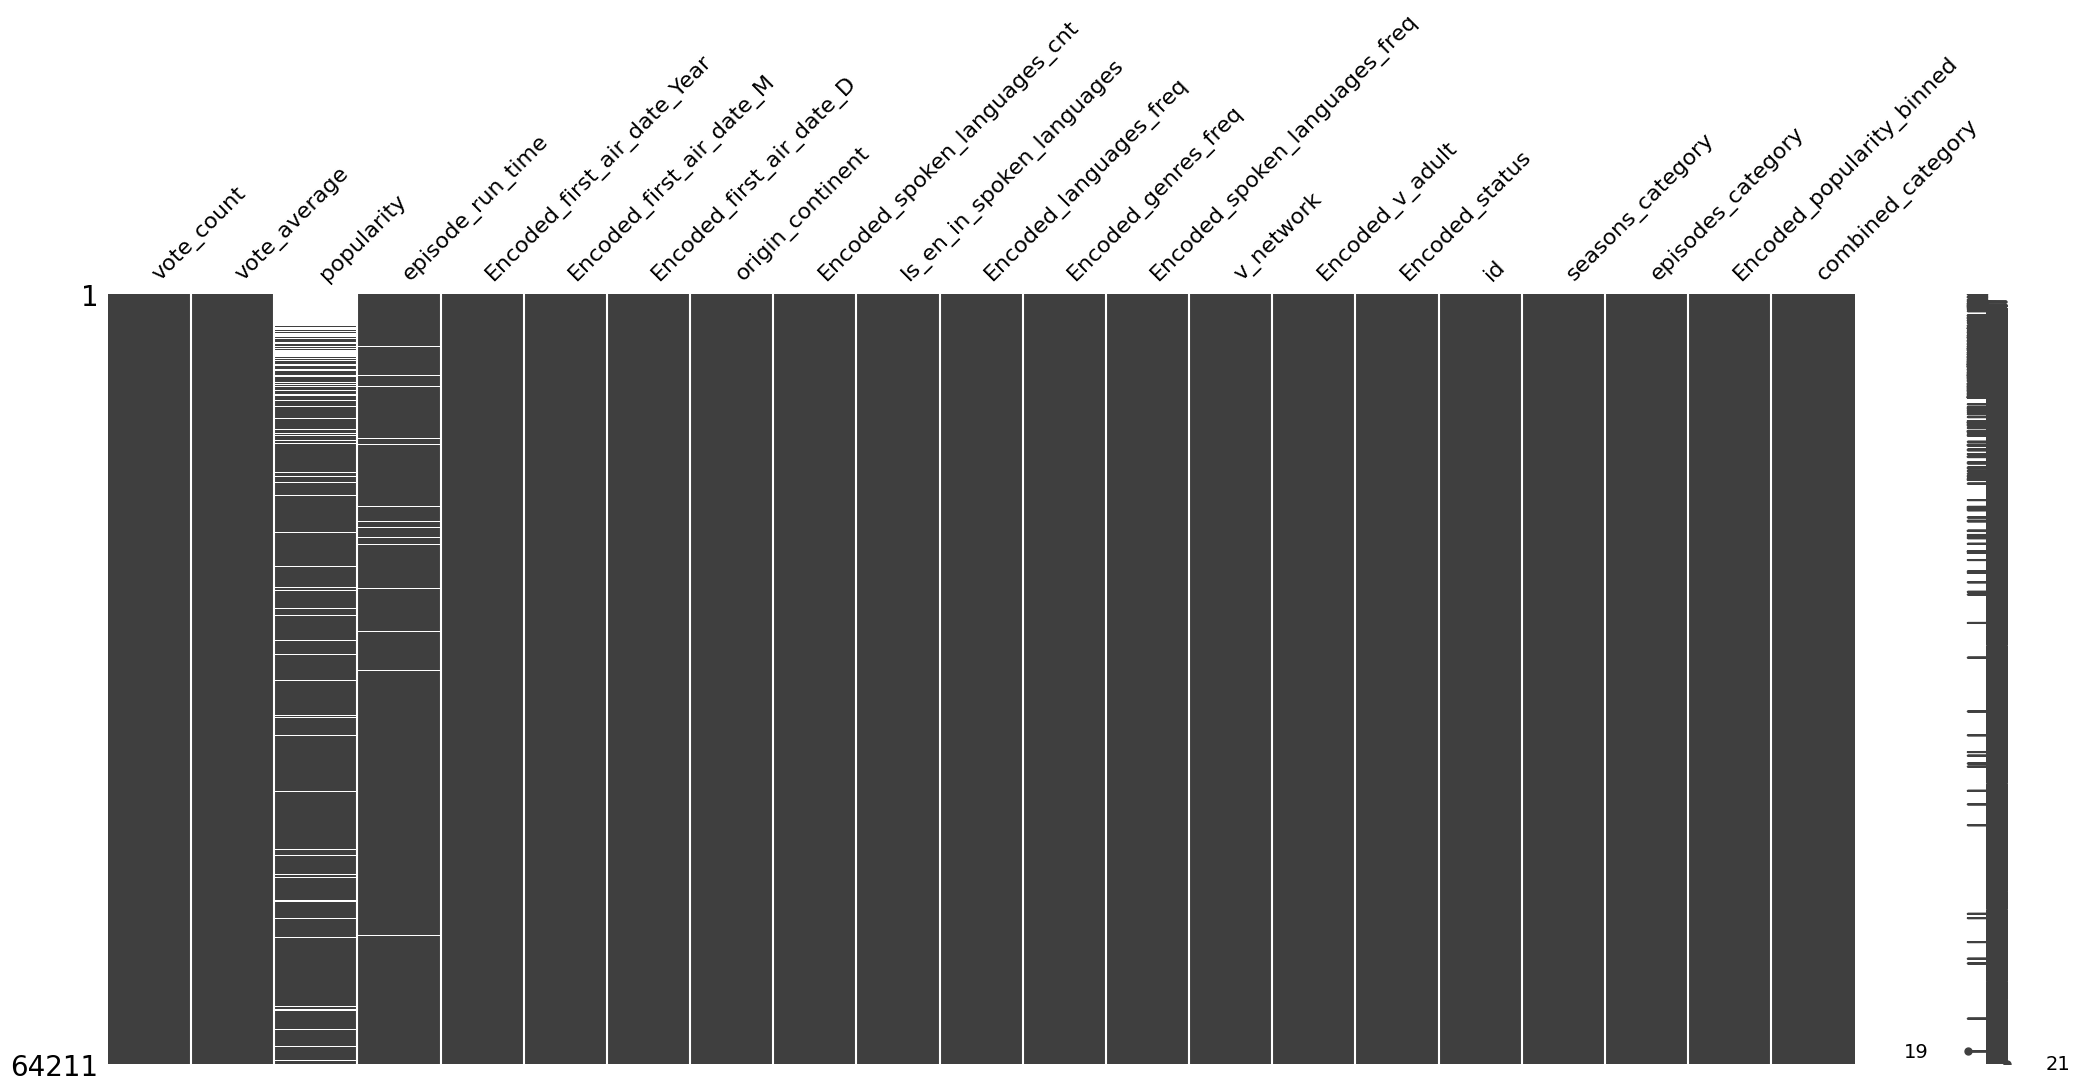

In [361]:
msno.matrix(dfload)

In [362]:
# Create a new column with adjusted categories
# dfload['v_network_adjusted'] = dfload['v_network'].apply(lambda x: x if x != 'Other' else 'Nan')
# dfload
# Drop the 'v_network_adjusted' column
#dfload = dfload.drop(columns=['v_network_adjusted'])

In [363]:
calculate_statistics(dfload, 'popularity', 1e-10)

Statistics for column 'popularity':
Count of NaN values: 8069
Count of 0 values: 847
Count of values equal to epsilon (1e-10): 0


In [364]:
# Apply the function It should be in the cleaning phase - apply here after one of the graph here revael it 
df_cleaned = drop_zero_or_epsilon(dfload, 'popularity', epsilon)

Number of rows before dropping: 64211
Number of rows after dropping: 63364


In [365]:
calculate_statistics(df_cleaned, 'popularity', 1e-10)

Statistics for column 'popularity':
Count of NaN values: 8069
Count of 0 values: 0
Count of values equal to epsilon (1e-10): 0


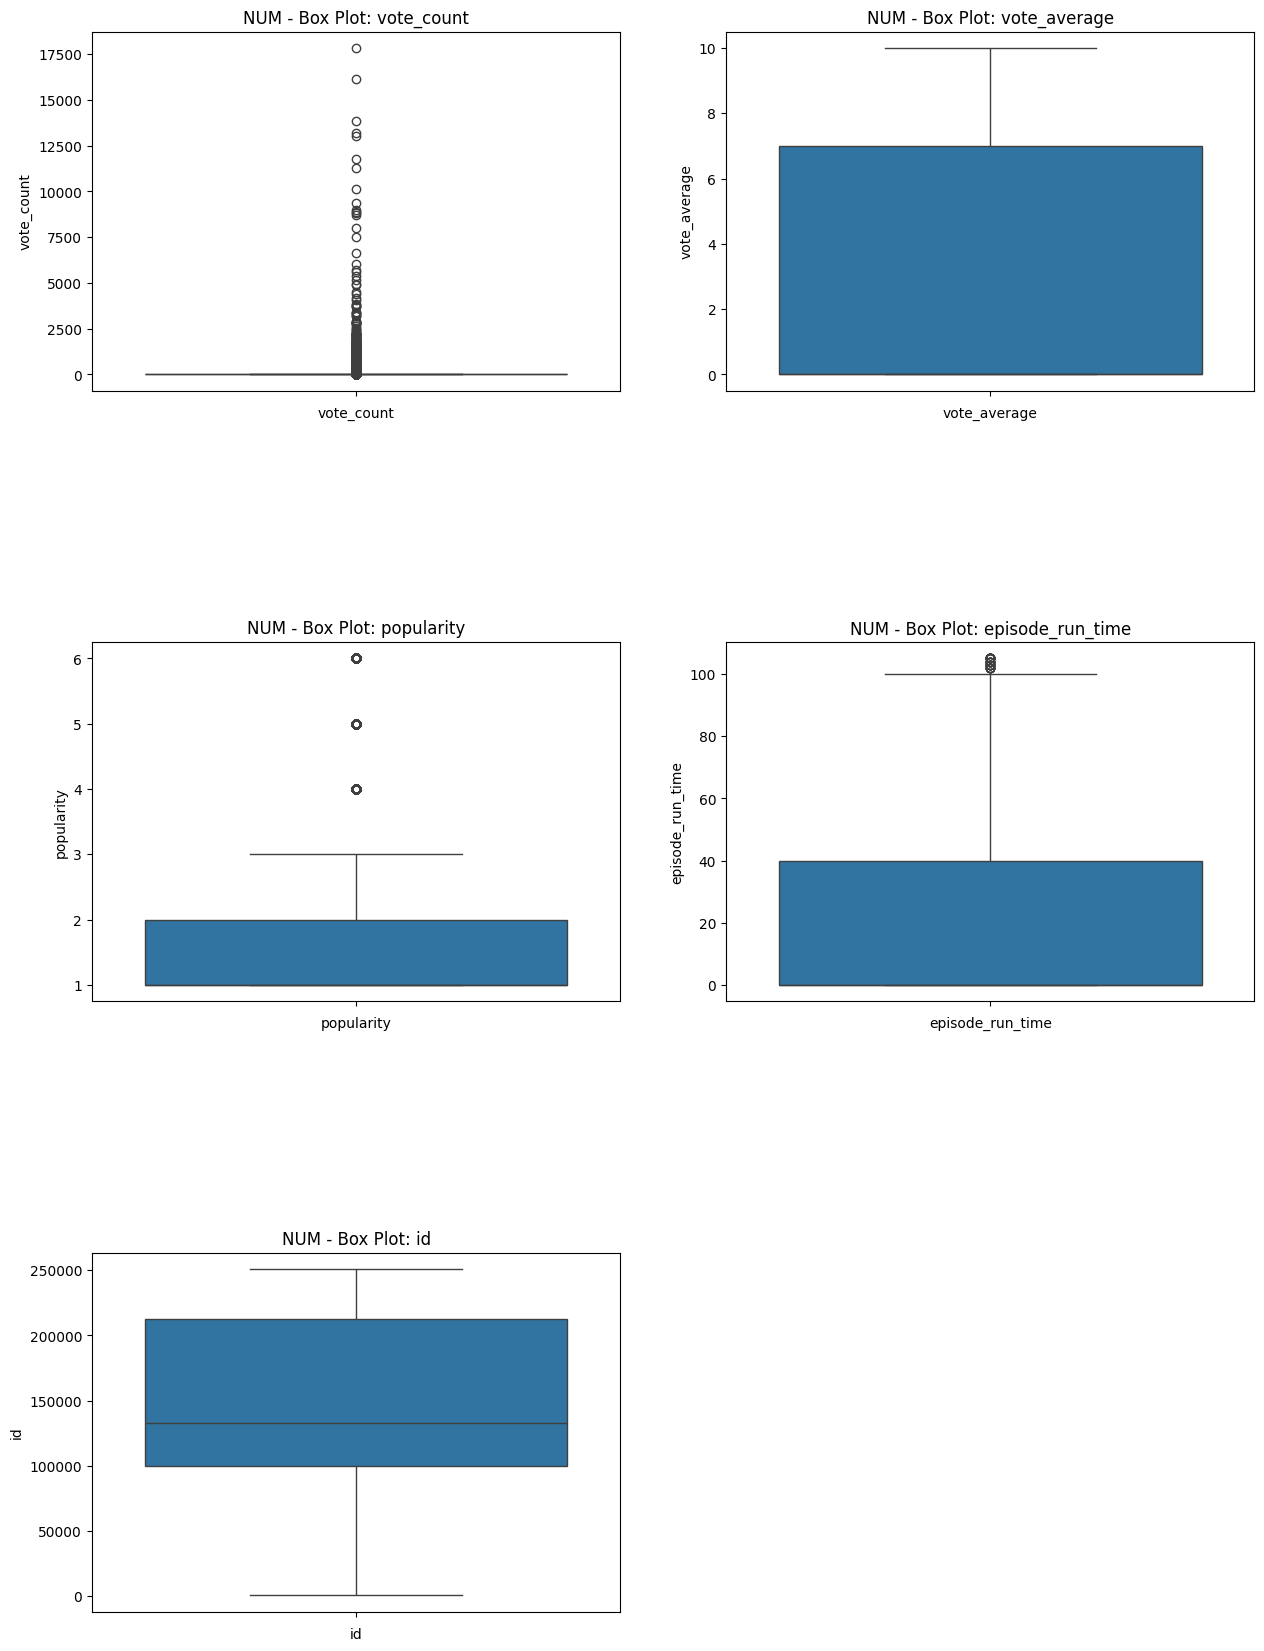

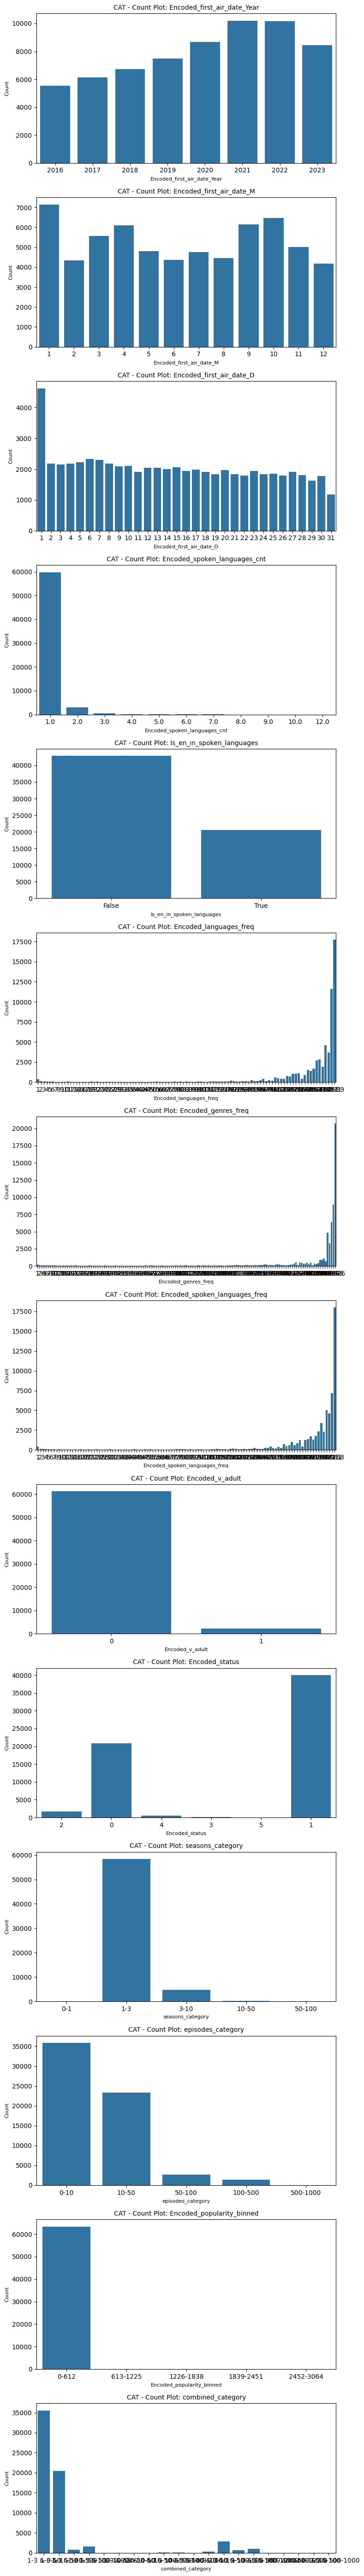

Encoded feature shows the mean but there are no Outliers - nominal discrete
NUM means numeric continues.


In [366]:
# Example usage with your DataFrame - see again the results after outlier removal
# dfload was cleaned from outliers instead  set as Nan on each outlier cell
outliers_boxplot(df_cleaned)
print('Encoded feature shows the mean but there are no Outliers - nominal discrete')
print('NUM means numeric continues.')

In [367]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63364 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   popularity                     55295 non-null  float64 
 3   episode_run_time               62407 non-null  float64 
 4   Encoded_first_air_date_Year    63364 non-null  category
 5   Encoded_first_air_date_M       63364 non-null  category
 6   Encoded_first_air_date_D       63364 non-null  category
 7   origin_continent               63364 non-null  int8    
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  

In [368]:
# Save cleaned data - clean from outlier and clean forom popularity =0
# df_cleaned.to_pickle('df_cleanedfromoutlier.pkl')

import joblib
joblib.dump(df_cleaned, 'df_cleanedfromoutlier.pkl')



['df_cleanedfromoutlier.pkl']

In [369]:
import pandas as pd
#load from pickle 
# dfload1 = pd.read_pickle('df_cleanedfromoutlier.pkl')

dfload1 = joblib.load('df_cleanedfromoutlier.pkl')
dfload1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63364 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   popularity                     55295 non-null  float64 
 3   episode_run_time               62407 non-null  float64 
 4   Encoded_first_air_date_Year    63364 non-null  category
 5   Encoded_first_air_date_M       63364 non-null  category
 6   Encoded_first_air_date_D       63364 non-null  category
 7   origin_continent               63364 non-null  int8    
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  

In [370]:
dfload1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63364 entries, 1 to 168638
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   popularity                     55295 non-null  float64 
 3   episode_run_time               62407 non-null  float64 
 4   Encoded_first_air_date_Year    63364 non-null  category
 5   Encoded_first_air_date_M       63364 non-null  category
 6   Encoded_first_air_date_D       63364 non-null  category
 7   origin_continent               63364 non-null  int8    
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  

<Axes: >

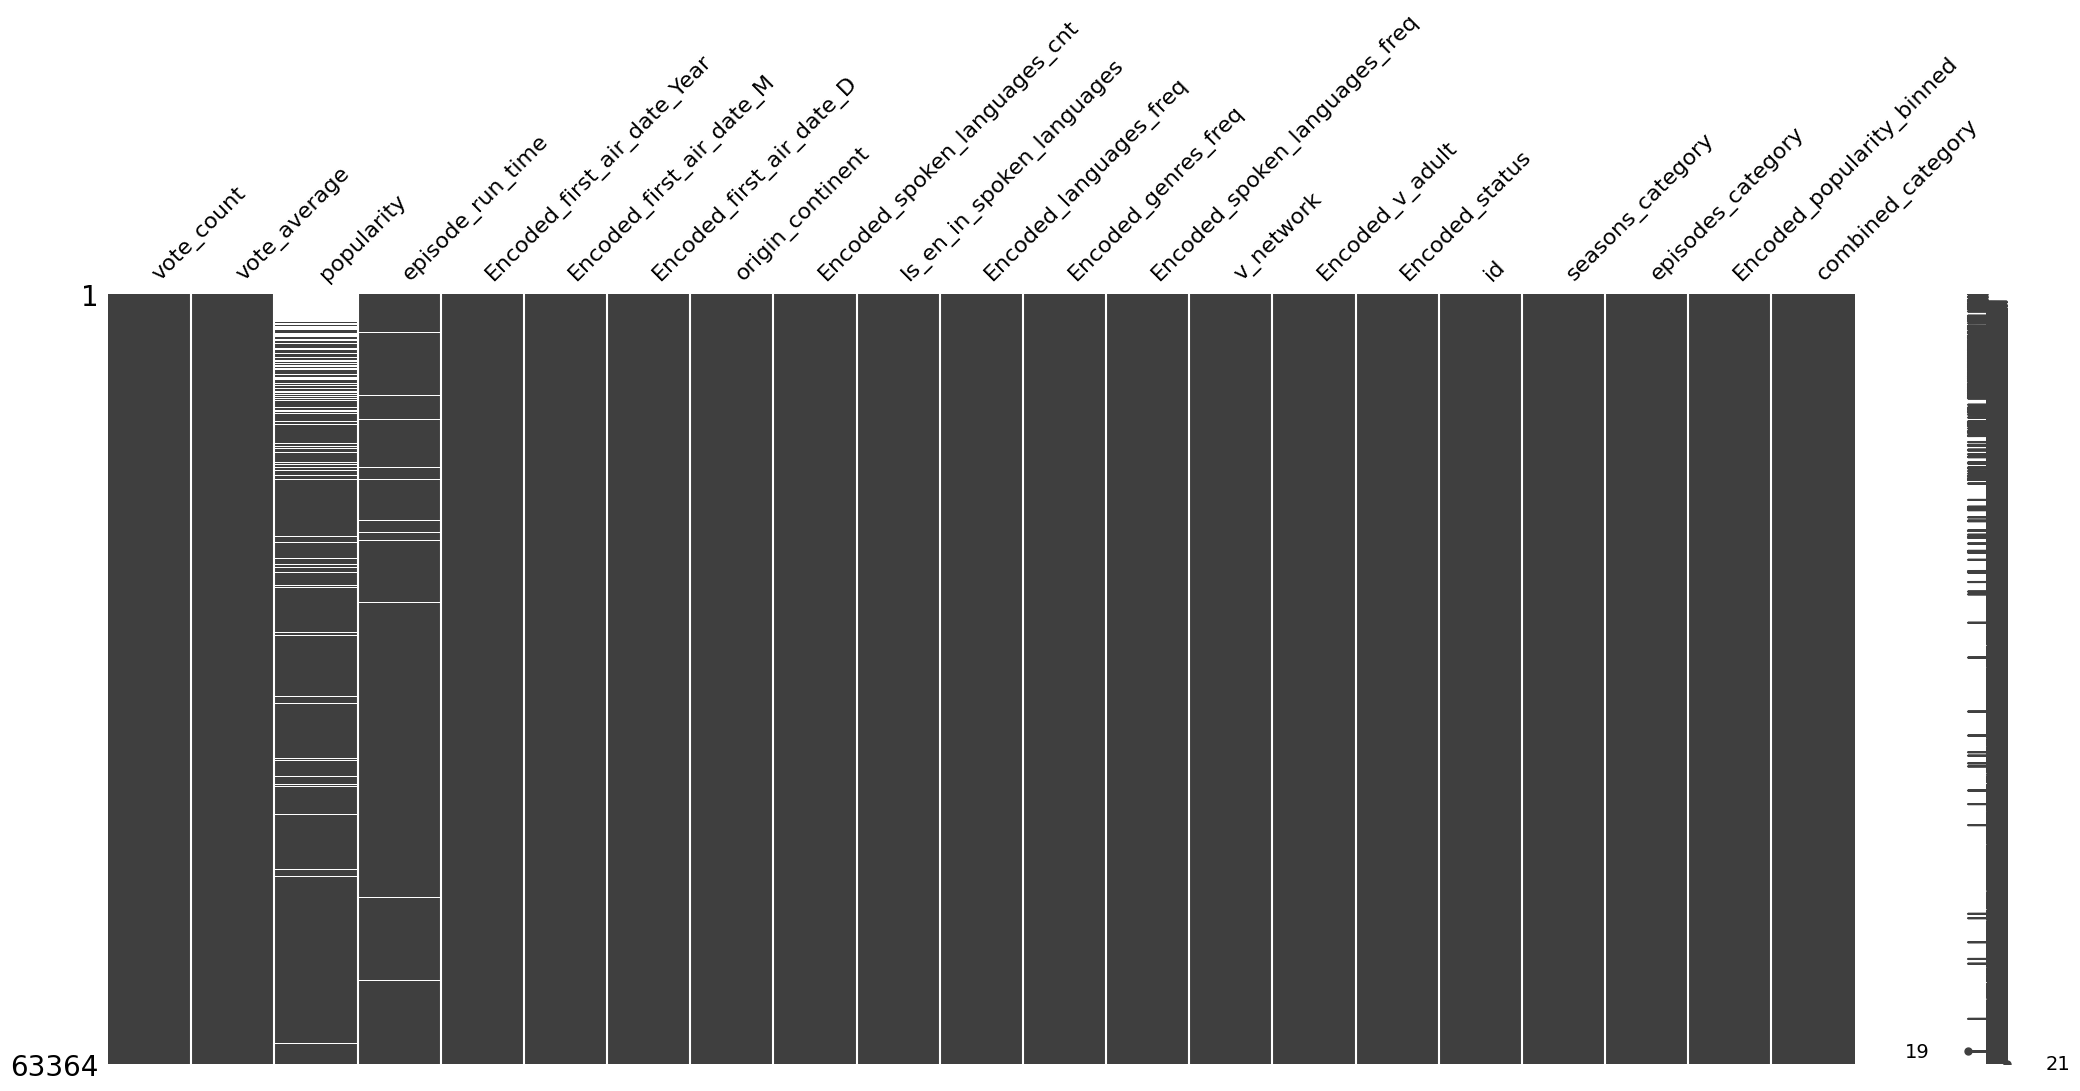

In [371]:
                                       #  Missing Data   #

# 2 Imputation  KNN


import missingno as msno
msno.matrix(dfload1)

In [372]:
print(dfload1.columns)

Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time',
       'Encoded_first_air_date_Year', 'Encoded_first_air_date_M',
       'Encoded_first_air_date_D', 'origin_continent',
       'Encoded_spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'Encoded_v_adult',
       'Encoded_status', 'id', 'seasons_category', 'episodes_category',
       'Encoded_popularity_binned', 'combined_category'],
      dtype='object')


In [373]:
print(dfload1.dtypes)

vote_count                        float64
vote_average                      float64
popularity                        float64
episode_run_time                  float64
Encoded_first_air_date_Year      category
Encoded_first_air_date_M         category
Encoded_first_air_date_D         category
origin_continent                     int8
Encoded_spoken_languages_cnt     category
Is_en_in_spoken_languages        category
Encoded_languages_freq           category
Encoded_genres_freq              category
Encoded_spoken_languages_freq    category
v_network                            int8
Encoded_v_adult                  category
Encoded_status                   category
id                                  int64
seasons_category                 category
episodes_category                category
Encoded_popularity_binned        category
combined_category                category
dtype: object


In [374]:
# Impute missing values
df_imputed, success = knn_impute1(dfload1, 'popularity')
#knn_impute_preserve_dtypes
df_imputed


Before Imputation
Shape: (63364, 21)
Missing values by column before imputation:
vote_count                          0
vote_average                        0
popularity                       8069
episode_run_time                  957
Encoded_first_air_date_Year         0
Encoded_first_air_date_M            0
Encoded_first_air_date_D            0
origin_continent                    0
Encoded_spoken_languages_cnt        0
Is_en_in_spoken_languages           0
Encoded_languages_freq              0
Encoded_genres_freq                 0
Encoded_spoken_languages_freq       0
v_network                           0
Encoded_v_adult                     0
Encoded_status                      0
id                                  0
seasons_category                    0
episodes_category                  11
Encoded_popularity_binned           1
combined_category                   0
dtype: int64

After Imputation
Shape: (63364, 21)
Missing values by column after imputation:
vote_count                  

,vote_count,vote_average,episode_run_time,origin_continent,v_network,id,Encoded_first_air_date_Year,Encoded_first_air_date_M,Encoded_first_air_date_D,Encoded_spoken_languages_cnt,...,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,Encoded_v_adult,Encoded_status,seasons_category,episodes_category,Encoded_popularity_binned,combined_category,popularity
0,17836.0,8.0,70.0,2,2,71446,2017,5,2,1.0,...,3853,985,5178,0,0,3-10,10-50,0-612,3-10 & 10-50,NaN
1,16161.0,9.0,0.0,3,2,66732,2016,7,15,1.0,...,38671,110,73268,0,1,3-10,10-50,0-612,3-10 & 10-50,NaN
2,13870.0,8.0,45.0,3,2,63174,2016,1,25,1.0,...,38671,14,73268,0,0,3-10,50-100,0-612,3-10 & 50-100,NaN
3,13180.0,8.0,45.0,3,4,69050,2017,1,26,1.0,...,38671,409,73268,0,0,3-10,100-500,0-612,3-10 & 100-500,NaN
4,13053.0,8.0,0.0,5,2,93405,2021,9,17,3.0,...,1,38,1,0,1,1-3,0-10,0-612,1-3 & 0-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,0.0,0.0,0.0,5,4,240293,2023,11,20,1.0,...,1421,16282,1405,0,1,1-3,10-50,0-612,1-3 & 10-50,4.0
63360,0.0,0.0,0.0,2,4,240693,2023,11,30,1.0,...,6204,25,7377,0,1,1-3,0-10,0-612,1-3 & 0-10,3.0
63361,0.0,0.0,0.0,5,4,239099,2023,3,3,1.0,...,58589,68926,14181,0,1,1-3,0-10,0-612,1-3 & 0-10,1.0
63362,0.0,0.0,0.0,5,4,240696,2023,11,30,1.0,...,199,1037,195,0,1,1-3,0-10,0-612,1-3 & 0-10,2.0


In [375]:
print(df_imputed.dtypes)

vote_count                        float64
vote_average                      float64
episode_run_time                  float64
origin_continent                     int8
v_network                            int8
id                                  int64
Encoded_first_air_date_Year      category
Encoded_first_air_date_M         category
Encoded_first_air_date_D         category
Encoded_spoken_languages_cnt     category
Is_en_in_spoken_languages        category
Encoded_languages_freq           category
Encoded_genres_freq              category
Encoded_spoken_languages_freq    category
Encoded_v_adult                  category
Encoded_status                   category
seasons_category                 category
episodes_category                category
Encoded_popularity_binned        category
combined_category                category
popularity                        float64
dtype: object


In [376]:
df_imputed

,vote_count,vote_average,episode_run_time,origin_continent,v_network,id,Encoded_first_air_date_Year,Encoded_first_air_date_M,Encoded_first_air_date_D,Encoded_spoken_languages_cnt,...,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,Encoded_v_adult,Encoded_status,seasons_category,episodes_category,Encoded_popularity_binned,combined_category,popularity
0,17836.0,8.0,70.0,2,2,71446,2017,5,2,1.0,...,3853,985,5178,0,0,3-10,10-50,0-612,3-10 & 10-50,NaN
1,16161.0,9.0,0.0,3,2,66732,2016,7,15,1.0,...,38671,110,73268,0,1,3-10,10-50,0-612,3-10 & 10-50,NaN
2,13870.0,8.0,45.0,3,2,63174,2016,1,25,1.0,...,38671,14,73268,0,0,3-10,50-100,0-612,3-10 & 50-100,NaN
3,13180.0,8.0,45.0,3,4,69050,2017,1,26,1.0,...,38671,409,73268,0,0,3-10,100-500,0-612,3-10 & 100-500,NaN
4,13053.0,8.0,0.0,5,2,93405,2021,9,17,3.0,...,1,38,1,0,1,1-3,0-10,0-612,1-3 & 0-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,0.0,0.0,0.0,5,4,240293,2023,11,20,1.0,...,1421,16282,1405,0,1,1-3,10-50,0-612,1-3 & 10-50,4.0
63360,0.0,0.0,0.0,2,4,240693,2023,11,30,1.0,...,6204,25,7377,0,1,1-3,0-10,0-612,1-3 & 0-10,3.0
63361,0.0,0.0,0.0,5,4,239099,2023,3,3,1.0,...,58589,68926,14181,0,1,1-3,0-10,0-612,1-3 & 0-10,1.0
63362,0.0,0.0,0.0,5,4,240696,2023,11,30,1.0,...,199,1037,195,0,1,1-3,0-10,0-612,1-3 & 0-10,2.0


In [377]:
calculate_statistics(df_imputed, 'popularity', 1e-10)


Statistics for column 'popularity':
Count of NaN values: 8069
Count of 0 values: 0
Count of values equal to epsilon (1e-10): 0


In [378]:
print(df_imputed.dtypes)

vote_count                        float64
vote_average                      float64
episode_run_time                  float64
origin_continent                     int8
v_network                            int8
id                                  int64
Encoded_first_air_date_Year      category
Encoded_first_air_date_M         category
Encoded_first_air_date_D         category
Encoded_spoken_languages_cnt     category
Is_en_in_spoken_languages        category
Encoded_languages_freq           category
Encoded_genres_freq              category
Encoded_spoken_languages_freq    category
Encoded_v_adult                  category
Encoded_status                   category
seasons_category                 category
episodes_category                category
Encoded_popularity_binned        category
combined_category                category
popularity                        float64
dtype: object


<Axes: >

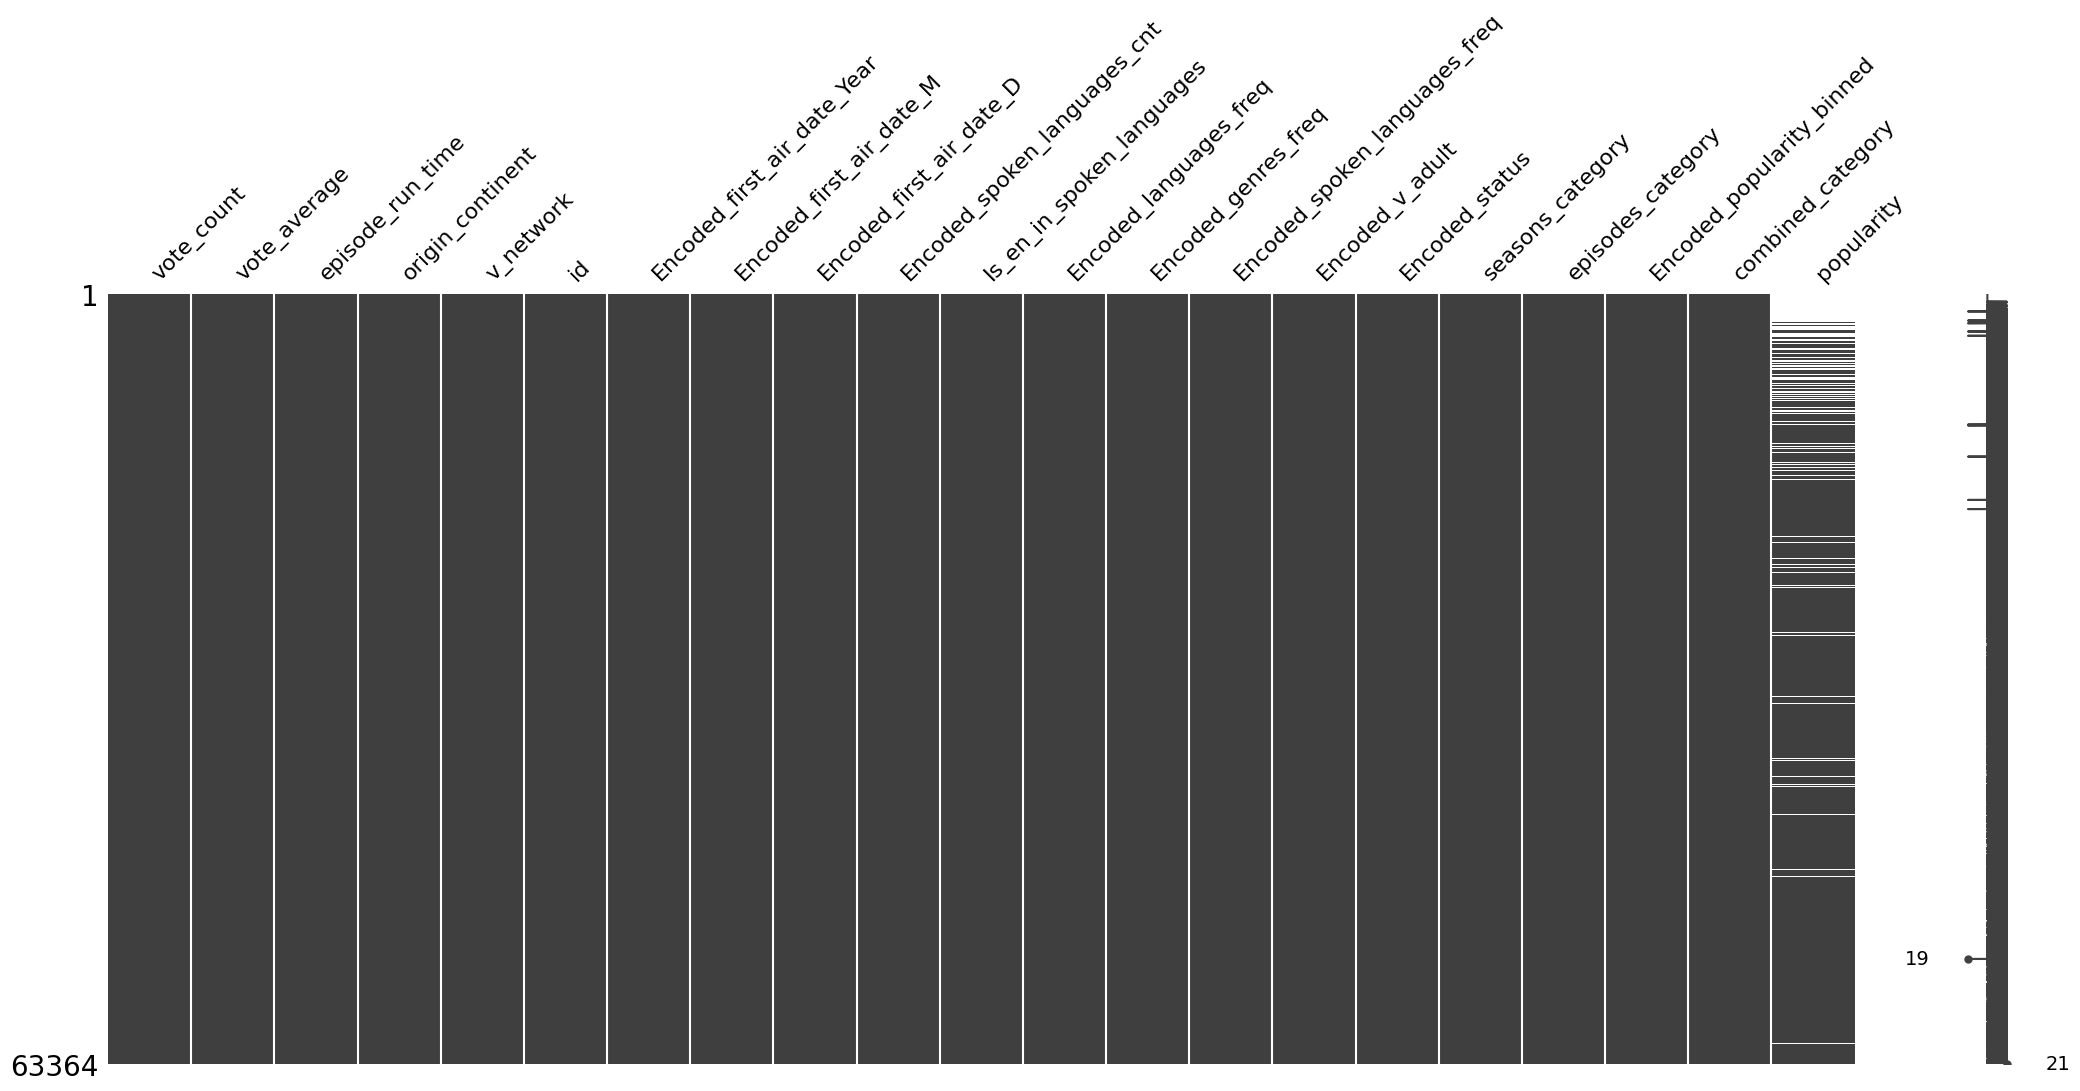

In [379]:
import missingno as msno
msno.matrix(df_imputed)

In [380]:
print(df_imputed.columns)

Index(['vote_count', 'vote_average', 'episode_run_time', 'origin_continent',
       'v_network', 'id', 'Encoded_first_air_date_Year',
       'Encoded_first_air_date_M', 'Encoded_first_air_date_D',
       'Encoded_spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'Encoded_v_adult', 'Encoded_status',
       'seasons_category', 'episodes_category', 'Encoded_popularity_binned',
       'combined_category', 'popularity'],
      dtype='object')


In [381]:
df_imputed['origin_continent'] = df_imputed['origin_continent'].astype('float64')
df_imputed['v_network'] = df_imputed['v_network'].astype('float64')

In [382]:
print(df_imputed.dtypes)

vote_count                        float64
vote_average                      float64
episode_run_time                  float64
origin_continent                  float64
v_network                         float64
id                                  int64
Encoded_first_air_date_Year      category
Encoded_first_air_date_M         category
Encoded_first_air_date_D         category
Encoded_spoken_languages_cnt     category
Is_en_in_spoken_languages        category
Encoded_languages_freq           category
Encoded_genres_freq              category
Encoded_spoken_languages_freq    category
Encoded_v_adult                  category
Encoded_status                   category
seasons_category                 category
episodes_category                category
Encoded_popularity_binned        category
combined_category                category
popularity                        float64
dtype: object


In [383]:
#3  Scaling after impute 

In [384]:


df_scaled = df_imputed.copy()


In [385]:
print(df_scaled.dtypes)

vote_count                        float64
vote_average                      float64
episode_run_time                  float64
origin_continent                  float64
v_network                         float64
id                                  int64
Encoded_first_air_date_Year      category
Encoded_first_air_date_M         category
Encoded_first_air_date_D         category
Encoded_spoken_languages_cnt     category
Is_en_in_spoken_languages        category
Encoded_languages_freq           category
Encoded_genres_freq              category
Encoded_spoken_languages_freq    category
Encoded_v_adult                  category
Encoded_status                   category
seasons_category                 category
episodes_category                category
Encoded_popularity_binned        category
combined_category                category
popularity                        float64
dtype: object


In [386]:
df_scaled

,vote_count,vote_average,episode_run_time,origin_continent,v_network,id,Encoded_first_air_date_Year,Encoded_first_air_date_M,Encoded_first_air_date_D,Encoded_spoken_languages_cnt,...,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,Encoded_v_adult,Encoded_status,seasons_category,episodes_category,Encoded_popularity_binned,combined_category,popularity
0,17836.0,8.0,70.0,2.0,2.0,71446,2017,5,2,1.0,...,3853,985,5178,0,0,3-10,10-50,0-612,3-10 & 10-50,NaN
1,16161.0,9.0,0.0,3.0,2.0,66732,2016,7,15,1.0,...,38671,110,73268,0,1,3-10,10-50,0-612,3-10 & 10-50,NaN
2,13870.0,8.0,45.0,3.0,2.0,63174,2016,1,25,1.0,...,38671,14,73268,0,0,3-10,50-100,0-612,3-10 & 50-100,NaN
3,13180.0,8.0,45.0,3.0,4.0,69050,2017,1,26,1.0,...,38671,409,73268,0,0,3-10,100-500,0-612,3-10 & 100-500,NaN
4,13053.0,8.0,0.0,5.0,2.0,93405,2021,9,17,3.0,...,1,38,1,0,1,1-3,0-10,0-612,1-3 & 0-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,0.0,0.0,0.0,5.0,4.0,240293,2023,11,20,1.0,...,1421,16282,1405,0,1,1-3,10-50,0-612,1-3 & 10-50,4.0
63360,0.0,0.0,0.0,2.0,4.0,240693,2023,11,30,1.0,...,6204,25,7377,0,1,1-3,0-10,0-612,1-3 & 0-10,3.0
63361,0.0,0.0,0.0,5.0,4.0,239099,2023,3,3,1.0,...,58589,68926,14181,0,1,1-3,0-10,0-612,1-3 & 0-10,1.0
63362,0.0,0.0,0.0,5.0,4.0,240696,2023,11,30,1.0,...,199,1037,195,0,1,1-3,0-10,0-612,1-3 & 0-10,2.0


In [387]:
def check_scaling_statistics(df_original, df_scaled):
    # Print columns to debug
    print("Original Data Columns:\n", df_original.columns)
    print("Scaled Data Columns:\n", df_scaled.columns)

    # Compute descriptive statistics for both original and scaled data
    original_stats = df_original.describe()
    scaled_stats = df_scaled.describe()

    # Print the statistics
    print("Original Data Statistics:\n", original_stats)
    print("\nScaled Data Statistics:\n", scaled_stats)


check_scaling_statistics(dfload,df_scaled)




Original Data Columns:
 Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time',
       'Encoded_first_air_date_Year', 'Encoded_first_air_date_M',
       'Encoded_first_air_date_D', 'origin_continent',
       'Encoded_spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'Encoded_v_adult',
       'Encoded_status', 'id', 'seasons_category', 'episodes_category',
       'Encoded_popularity_binned', 'combined_category'],
      dtype='object')
Scaled Data Columns:
 Index(['vote_count', 'vote_average', 'episode_run_time', 'origin_continent',
       'v_network', 'id', 'Encoded_first_air_date_Year',
       'Encoded_first_air_date_M', 'Encoded_first_air_date_D',
       'Encoded_spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'Encoded_v_adult', 'Encoded_status',
       'seasons_

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(df_original, df_scaled, features):
    for feature in features:
        if feature in df_original.columns:
            plt.figure(figsize=(12, 6))

            # Plot original data
            plt.subplot(1, 2, 1)
            sns.histplot(df_original[feature], kde=True)
            plt.title(f'{feature} - Original')

            # Plot scaled data if feature is present
            if feature in df_scaled.columns:
                plt.subplot(1, 2, 2)
                sns.histplot(df_scaled[feature], kde=True)
                plt.title(f'{feature} - Scaled')
            else:
                plt.subplot(1, 2, 2)
                plt.text(0.5, 0.5, 'Feature not scaled', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
                plt.title(f'{feature} - Scaled')

            plt.tight_layout()
            plt.show()
        else:
            print(f"Feature {feature} not found in original DataFrame.")

# Example usage with feature names
#  SKIP plot_feature_distributions(dfload,df_scaled, ['vote_count', 'vote_average'])


In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(df_original, df_scaled, features):
    for feature in features:
        if feature not in df_original.columns:
            print(f"Feature {feature} not found in original DataFrame.")
            continue
        if feature not in df_scaled.columns:
            print(f"Feature {feature} not found in scaled DataFrame.")
            continue

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(df_original[feature], kde=True)
        plt.title(f'{feature} - Original')

        plt.subplot(1, 2, 2)
        sns.histplot(df_scaled[feature], kde=True)
        plt.title(f'{feature} - Scaled')

        plt.tight_layout()
        plt.show()

# Example usage with feature names
#SKIP plot_feature_distributions(dfload,df_scaled, ['vote_count', 'vote_average'])


In [390]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   episode_run_time               63364 non-null  float64 
 3   origin_continent               63364 non-null  float64 
 4   v_network                      63364 non-null  float64 
 5   id                             63364 non-null  int64   
 6   Encoded_first_air_date_Year    63364 non-null  category
 7   Encoded_first_air_date_M       63364 non-null  category
 8   Encoded_first_air_date_D       63364 non-null  category
 9   Encoded_spoken_languages_cnt   63364 non-null  category
 10  Is_en_in_spoken_languages      63364 non-null  category
 11  Encoded_languages_freq         63364 non-null  category
 12  Encoded_genres_freq            6

In [391]:
# Impute missing values
df_final, success_percentage = knn_impute1(df_scaled, ['popularity'])
#knn_impute_preserve_dtypes
success_percentage

Before Imputation
Shape: (63364, 21)
Missing values by column before imputation:
vote_count                          0
vote_average                        0
episode_run_time                    0
origin_continent                    0
v_network                           0
id                                  0
Encoded_first_air_date_Year         0
Encoded_first_air_date_M            0
Encoded_first_air_date_D            0
Encoded_spoken_languages_cnt        0
Is_en_in_spoken_languages           0
Encoded_languages_freq              0
Encoded_genres_freq                 0
Encoded_spoken_languages_freq       0
Encoded_v_adult                     0
Encoded_status                      0
seasons_category                    0
episodes_category                  11
Encoded_popularity_binned           1
combined_category                   0
popularity                       8069
dtype: int64

After Imputation
Shape: (63364, 21)
Missing values by column after imputation:
vote_count                  

100

In [395]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   episode_run_time               63364 non-null  float64 
 3   origin_continent               63364 non-null  float64 
 4   v_network                      63364 non-null  float64 
 5   id                             63364 non-null  int64   
 6   Encoded_first_air_date_Year    63364 non-null  category
 7   Encoded_first_air_date_M       63364 non-null  category
 8   Encoded_first_air_date_D       63364 non-null  category
 9   Encoded_spoken_languages_cnt   63364 non-null  category
 10  Is_en_in_spoken_languages      63364 non-null  category
 11  Encoded_languages_freq         63364 non-null  category
 12  Encoded_genres_freq            6

In [396]:
df_final['episodes_category']

0          10-50
1          10-50
2         50-100
3        100-500
4           0-10
          ...   
63359      10-50
63360       0-10
63361       0-10
63362       0-10
63363       0-10
Name: episodes_category, Length: 63364, dtype: category
Categories (5, object): ['0-10' < '10-50' < '50-100' < '100-500' < '500-1000']

<Axes: >

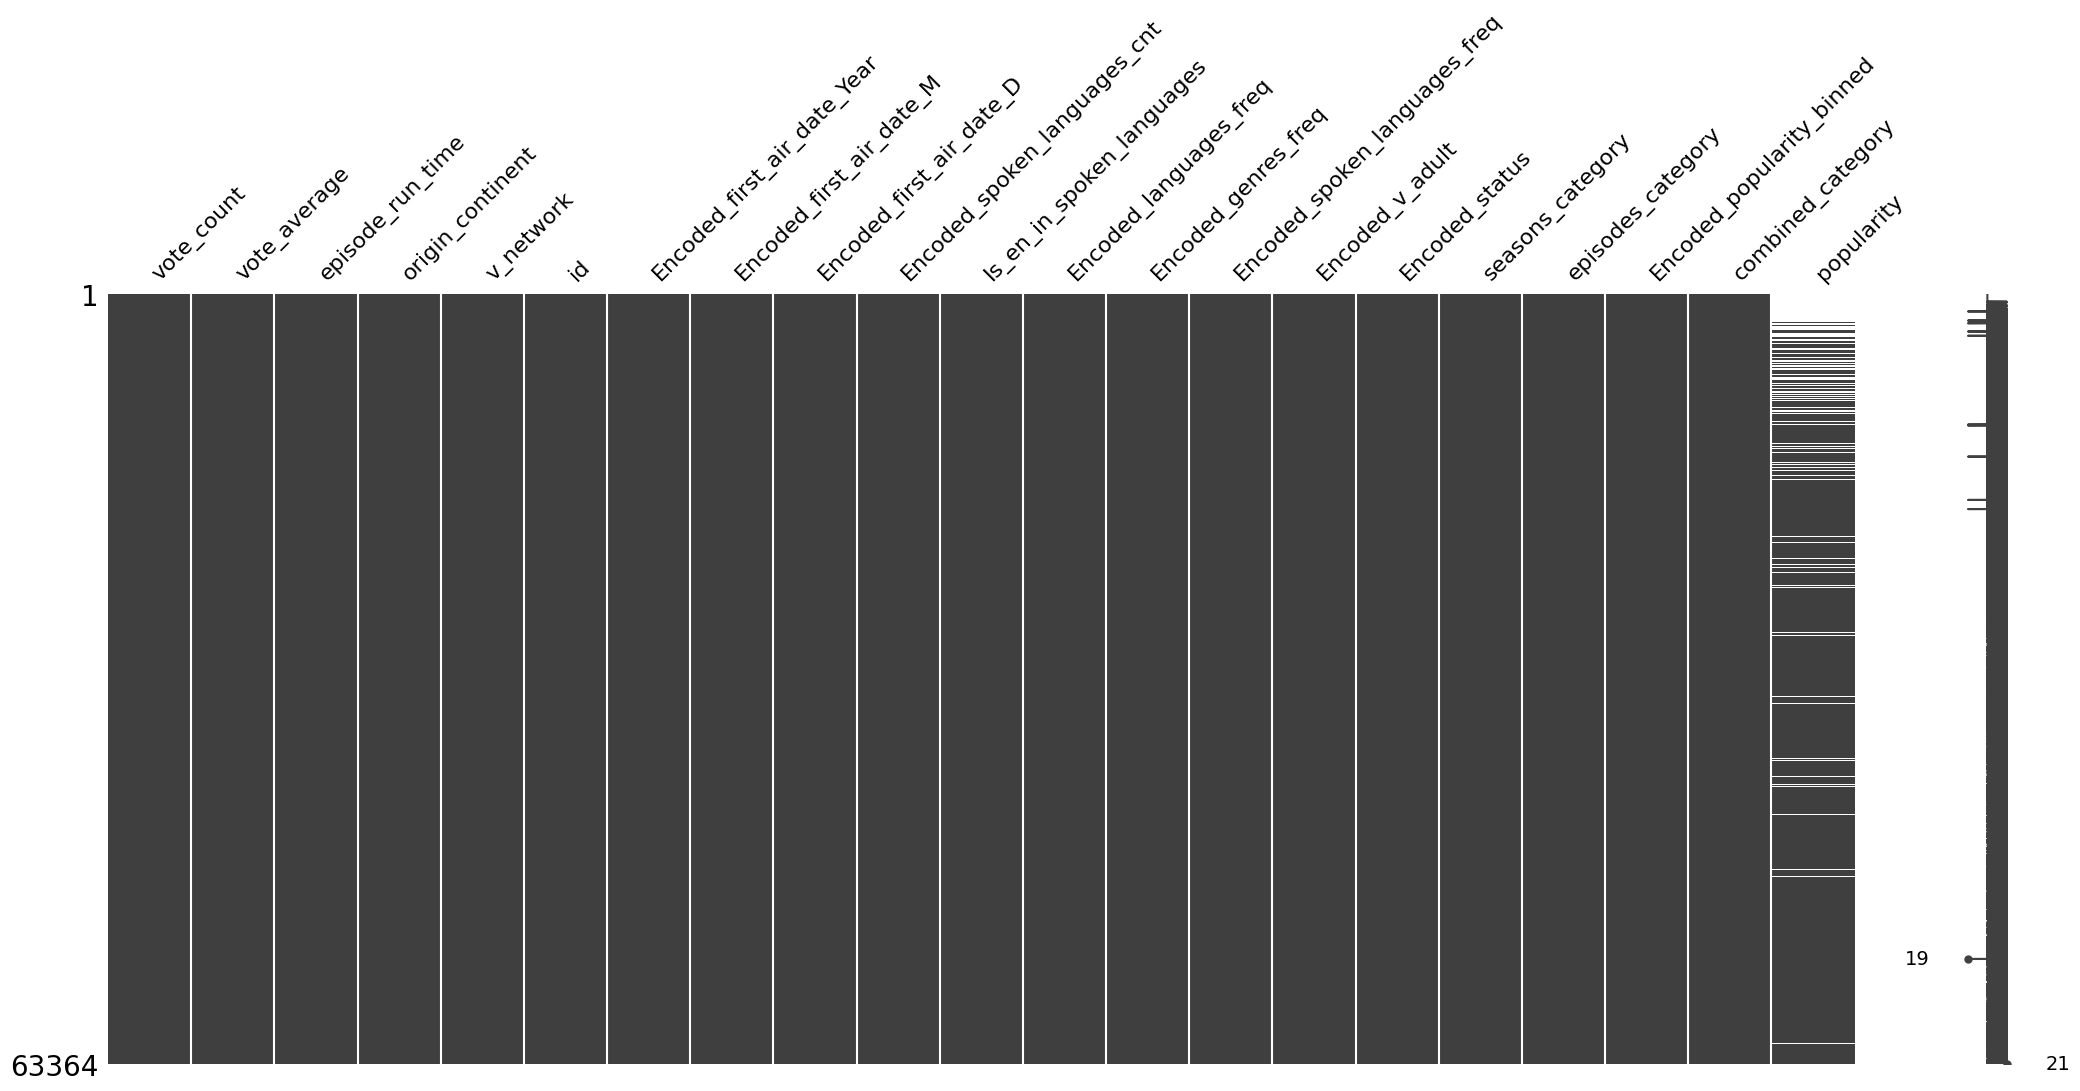

In [397]:
import missingno as msno
msno.matrix(df_final)

In [398]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   episode_run_time               63364 non-null  float64 
 3   origin_continent               63364 non-null  float64 
 4   v_network                      63364 non-null  float64 
 5   id                             63364 non-null  int64   
 6   Encoded_first_air_date_Year    63364 non-null  category
 7   Encoded_first_air_date_M       63364 non-null  category
 8   Encoded_first_air_date_D       63364 non-null  category
 9   Encoded_spoken_languages_cnt   63364 non-null  category
 10  Is_en_in_spoken_languages      63364 non-null  category
 11  Encoded_languages_freq         63364 non-null  category
 12  Encoded_genres_freq            6

In [399]:
df_finalto = df_final.copy()

In [400]:
df_finalto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   episode_run_time               63364 non-null  float64 
 3   origin_continent               63364 non-null  float64 
 4   v_network                      63364 non-null  float64 
 5   id                             63364 non-null  int64   
 6   Encoded_first_air_date_Year    63364 non-null  category
 7   Encoded_first_air_date_M       63364 non-null  category
 8   Encoded_first_air_date_D       63364 non-null  category
 9   Encoded_spoken_languages_cnt   63364 non-null  category
 10  Is_en_in_spoken_languages      63364 non-null  category
 11  Encoded_languages_freq         63364 non-null  category
 12  Encoded_genres_freq            6

In [401]:
# Example usage:
df_final1_1 = df_final.copy()
#df_final1, success = mice_impute_with_categorical(df_finalto, ['popularity', 'episodes_category'])

In [402]:
df_final1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     63364 non-null  float64 
 1   vote_average                   63364 non-null  float64 
 2   episode_run_time               63364 non-null  float64 
 3   origin_continent               63364 non-null  float64 
 4   v_network                      63364 non-null  float64 
 5   id                             63364 non-null  int64   
 6   Encoded_first_air_date_Year    63364 non-null  category
 7   Encoded_first_air_date_M       63364 non-null  category
 8   Encoded_first_air_date_D       63364 non-null  category
 9   Encoded_spoken_languages_cnt   63364 non-null  category
 10  Is_en_in_spoken_languages      63364 non-null  category
 11  Encoded_languages_freq         63364 non-null  category
 12  Encoded_genres_freq            6

In [434]:
# Assuming df_final1_1 is your DataFrame and you want to count values in 'column_name'
df_final1_1['vote_count'].value_counts()


0.0        37891
1.0         9666
2.0         3766
3.0         2046
4.0         1260
           ...  
271.0          1
272.0          1
273.0          1
668.0          1
17836.0        1
Name: vote_count, Length: 740, dtype: int64

In [435]:
df_final1_1['vote_average'].value_counts()

0.0     37914
8.0      6243
7.0      5767
6.0      4439
10.0     2752
9.0      1804
5.0      1513
2.0      1225
4.0       997
1.0       397
3.0       313
Name: vote_average, dtype: int64

In [437]:
# Identify the indices where both 'vote_count' and 'vote_average' are 0
crossed_positions = df_final1_1[(df_final1_1['vote_count'] == 0) & (df_final1_1['vote_average'] == 0)].index
crossed_count = crossed_positions.shape[0]

# Count the number of rows where both 'vote_count' and 'vote_average' are exactly 0
crossed_count = ((df_final1_1['vote_count'] == 0) & (df_final1_1['vote_average'] == 0)).sum()

# Print the count
print(f"Number of rows where both 'vote_count' and 'vote_average' are 0: {crossed_count}")
# Print the indices
print("Indices where both 'vote_count' and 'vote_average' are 0:")
print(crossed_positions)

# 41 items are not overlapped.

Number of rows where both 'vote_count' and 'vote_average' are 0: 37850
Indices where both 'vote_count' and 'vote_average' are 0:
Int64Index([25473, 25474, 25475, 25476, 25477, 25478, 25479, 25480, 25481,
            25482,
            ...
            63354, 63355, 63356, 63357, 63358, 63359, 63360, 63361, 63362,
            63363],
           dtype='int64', length=37850)


In [403]:
# should replace the random_forest_impute  

df_final2_1, success = random_forest_impute(df_final1_1, 'popularity')

Before Imputation
Shape: (63364, 21)
Missing values by column before imputation:
vote_count                          0
vote_average                        0
episode_run_time                    0
origin_continent                    0
v_network                           0
id                                  0
Encoded_first_air_date_Year         0
Encoded_first_air_date_M            0
Encoded_first_air_date_D            0
Encoded_spoken_languages_cnt        0
Is_en_in_spoken_languages           0
Encoded_languages_freq              0
Encoded_genres_freq                 0
Encoded_spoken_languages_freq       0
Encoded_v_adult                     0
Encoded_status                      0
seasons_category                    0
episodes_category                  11
Encoded_popularity_binned           1
combined_category                   0
popularity                       8069
dtype: int64

After Imputation
Shape: (63364, 21)
Missing values by column after imputation:
vote_count                  

In [404]:
# vote_count' and 'vote_average - transfer to next notebook do only after impute 
# I should not drop till i will fill with impute the values. if zero the impute will not work but to Nan 


# Replace NaN values with an arbitrary value (e.g., 0) and then perform the multiplication - leave it as Int
df_final2_1['Mul_count_average_vote'] = (
    df_final2_1['vote_count'].fillna(0) * df_final2_1['vote_average'].fillna(0))

# Drop the original columns 'vote_count' and 'vote_average'
df_final2_3 = df_final2_1.drop(columns=['vote_count', 'vote_average'])


# Scale and encode data
df_scaled = scale_and_encode(df_final2_3, scale_columns=['Mul_count_average_vote'], scaler_type='minmax')
#error
print("Imputed and Scaled DataFrame:")
print(df_scaled.head())

# remove min max from vote

Shape before transformation: (63364, 20)
Shape after transformation: (63364, 20)
Imputed and Scaled DataFrame:
   Mul_count_average_vote  episode_run_time  origin_continent  v_network  \
0                0.981017              70.0               2.0        2.0   
1                1.000000               0.0               3.0        2.0   
2                0.762879              45.0               3.0        2.0   
3                0.724928              45.0               3.0        4.0   
4                0.717942               0.0               5.0        2.0   

      id Encoded_first_air_date_Year Encoded_first_air_date_M  \
0  71446                        2017                        5   
1  66732                        2016                        7   
2  63174                        2016                        1   
3  69050                        2017                        1   
4  93405                        2021                        9   

  Encoded_first_air_date_D Encoded_spoken

In [405]:
df_final2_1 = df_scaled.copy()

In [406]:
#callSpecificNancheck(df_final2_1)

Values from 'episodes_category':
  Row Index: 2184, Value: nan
  Row Index: 2405, Value: nan
  Row Index: 3080, Value: nan
  Row Index: 3440, Value: nan
  Row Index: 10746, Value: nan
  Row Index: 10812, Value: nan
  Row Index: 13382, Value: nan
  Row Index: 16926, Value: nan
  Row Index: 16946, Value: nan
  Row Index: 17697, Value: nan
  Row Index: 54720, Value: nan

Values from 'Encoded_popularity_binned':
  Row Index: 1432, Value: nan



KeyError: 'episodes_category_imputed'

In [408]:
df_final2_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Mul_count_average_vote         63364 non-null  float64 
 1   episode_run_time               63364 non-null  float64 
 2   origin_continent               63364 non-null  float64 
 3   v_network                      63364 non-null  float64 
 4   id                             63364 non-null  int64   
 5   Encoded_first_air_date_Year    63364 non-null  category
 6   Encoded_first_air_date_M       63364 non-null  category
 7   Encoded_first_air_date_D       63364 non-null  category
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  6

In [409]:
# Apply the function
imputed_data, success_rate = impute_and_encode(df_final2_1, 'episodes_category')

# Check the final data and success rate
print(imputed_data)
print(f"Success Rate: {success_rate:.2f}")
# episodes_category_imputed created here and drop the episodes_category



Missing values before imputation in 'episodes_category': 11
Missing values after imputation in 'episodes_category_imputed': 0
       Mul_count_average_vote  episode_run_time  origin_continent  v_network  \
0                    0.981017              70.0               2.0        2.0   
1                    1.000000               0.0               3.0        2.0   
2                    0.762879              45.0               3.0        2.0   
3                    0.724928              45.0               3.0        4.0   
4                    0.717942               0.0               5.0        2.0   
...                       ...               ...               ...        ...   
63359                0.000000               0.0               5.0        4.0   
63360                0.000000               0.0               2.0        4.0   
63361                0.000000               0.0               5.0        4.0   
63362                0.000000               0.0               5.0        4

In [410]:
imputed_data['episodes_category_imputed'] = imputed_data['episodes_category_imputed'].astype('category')
imputed_data['episodes_category_encoded'] = imputed_data['episodes_category_encoded'].astype('category')




In [411]:

    # List of row positions for the different columns
    rows_episodes_category = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720, 10,80,500,1500]
    rows_encoded_popularity_binned = [1432,55]
    rows_episodes_category_imputed = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720, 10,80,500,1500]
    
    # Call the function for each column
    print_values_at_positions(imputed_data, 'episodes_category', rows_episodes_category)
    print_values_at_positions(imputed_data, 'Encoded_popularity_binned', rows_encoded_popularity_binned)
    print_values_at_positions(imputed_data, 'episodes_category_imputed', rows_episodes_category_imputed)
    print_values_at_positions(imputed_data, 'episodes_category_encoded', rows_episodes_category_imputed)


Values from 'episodes_category':
  Row Index: 2184, Value: nan
  Row Index: 2405, Value: nan
  Row Index: 3080, Value: nan
  Row Index: 3440, Value: nan
  Row Index: 10746, Value: nan
  Row Index: 10812, Value: nan
  Row Index: 13382, Value: nan
  Row Index: 16926, Value: nan
  Row Index: 16946, Value: nan
  Row Index: 17697, Value: nan
  Row Index: 54720, Value: nan
  Row Index: 10, Value: 10-50
  Row Index: 80, Value: 10-50
  Row Index: 500, Value: 10-50
  Row Index: 1500, Value: 10-50

Values from 'Encoded_popularity_binned':
  Row Index: 1432, Value: nan
  Row Index: 55, Value: 0-612

Values from 'episodes_category_imputed':
  Row Index: 2184, Value: 0-10
  Row Index: 2405, Value: 0-10
  Row Index: 3080, Value: 0-10
  Row Index: 3440, Value: 0-10
  Row Index: 10746, Value: 0-10
  Row Index: 10812, Value: 0-10
  Row Index: 13382, Value: 0-10
  Row Index: 16926, Value: 0-10
  Row Index: 16946, Value: 0-10
  Row Index: 17697, Value: 0-10
  Row Index: 54720, Value: 0-10
  Row Index: 10

In [412]:
# Compute Cramer's which is sort of correlation  V between 'Category1' and 'Category2'
cramers_v_value = cramers_v(imputed_data['episodes_category_encoded'], imputed_data['episodes_category'])

print(f"Cramér's V between 'Category1' and 'Category2': {cramers_v_value:.2f}")


Cramér's V between 'Category1' and 'Category2': 1.00


In [413]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Mul_count_average_vote         63364 non-null  float64 
 1   episode_run_time               63364 non-null  float64 
 2   origin_continent               63364 non-null  float64 
 3   v_network                      63364 non-null  float64 
 4   id                             63364 non-null  int64   
 5   Encoded_first_air_date_Year    63364 non-null  category
 6   Encoded_first_air_date_M       63364 non-null  category
 7   Encoded_first_air_date_D       63364 non-null  category
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  6

In [414]:
# Attempt to drop the 'episodes_category' column
if 'episodes_category' in imputed_data.columns:
    imputed_data.drop(columns='episodes_category', inplace=True)

# Rename 'episodes_category_imputed' to 'episodes_category'
imputed_data.rename(columns={'episodes_category_imputed': 'episodes_category'}, inplace=True)


In [415]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Mul_count_average_vote         63364 non-null  float64 
 1   episode_run_time               63364 non-null  float64 
 2   origin_continent               63364 non-null  float64 
 3   v_network                      63364 non-null  float64 
 4   id                             63364 non-null  int64   
 5   Encoded_first_air_date_Year    63364 non-null  category
 6   Encoded_first_air_date_M       63364 non-null  category
 7   Encoded_first_air_date_D       63364 non-null  category
 8   Encoded_spoken_languages_cnt   63364 non-null  category
 9   Is_en_in_spoken_languages      63364 non-null  category
 10  Encoded_languages_freq         63364 non-null  category
 11  Encoded_genres_freq            63364 non-null  category
 12  Encoded_spoken_languages_freq  6

In [416]:
imputed_data.isna().sum()

Mul_count_average_vote           0
episode_run_time                 0
origin_continent                 0
v_network                        0
id                               0
Encoded_first_air_date_Year      0
Encoded_first_air_date_M         0
Encoded_first_air_date_D         0
Encoded_spoken_languages_cnt     0
Is_en_in_spoken_languages        0
Encoded_languages_freq           0
Encoded_genres_freq              0
Encoded_spoken_languages_freq    0
Encoded_v_adult                  0
Encoded_status                   0
seasons_category                 0
Encoded_popularity_binned        1
combined_category                0
popularity                       0
episodes_category                0
episodes_category_encoded        0
dtype: int64

In [417]:
# now handle the last Nan  in column 

df_final2_2 = imputed_data.copy()
# Apply the function
imputed_data, success_rate = impute_and_encode(df_final2_2, 'Encoded_popularity_binned')

# Encoded_popularity_binned is the missing column, will be droped if correlation is above 1 so all are in after the impute
# Encoded_popularity_binned_Encoded   ,Encoded_popularity_binned_imputed 
# Check the final data and success rate
print(imputed_data)
print(f"Success Rate: {success_rate:.2f}")
# episodes_category_imputed created here and drop the episodes_category

Missing values before imputation in 'Encoded_popularity_binned': 1
Missing values after imputation in 'Encoded_popularity_binned_imputed': 0
       Mul_count_average_vote  episode_run_time  origin_continent  v_network  \
0                    0.981017              70.0               2.0        2.0   
1                    1.000000               0.0               3.0        2.0   
2                    0.762879              45.0               3.0        2.0   
3                    0.724928              45.0               3.0        4.0   
4                    0.717942               0.0               5.0        2.0   
...                       ...               ...               ...        ...   
63359                0.000000               0.0               5.0        4.0   
63360                0.000000               0.0               2.0        4.0   
63361                0.000000               0.0               5.0        4.0   
63362                0.000000               0.0            

In [418]:


    # List of row positions for the different columns
    Encoded_popularity_binned = [1432, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720, 10,80,500,1500]
    Encoded_popularity_binned_imputed = [1432, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720, 10,80,500,1500]
    Encoded_popularity_binned_encoded = [1432, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720, 10,80,500,1500]
    
    # Call the function for each column
  
    print_values_at_positions(imputed_data, 'Encoded_popularity_binned', Encoded_popularity_binned)
    print_values_at_positions(imputed_data, 'Encoded_popularity_binned_imputed', Encoded_popularity_binned_imputed)
    print_values_at_positions(imputed_data, 'Encoded_popularity_binned_encoded', Encoded_popularity_binned_encoded)


Values from 'Encoded_popularity_binned':
  Row Index: 1432, Value: nan
  Row Index: 2405, Value: 613-1225
  Row Index: 3080, Value: 0-612
  Row Index: 3440, Value: 1839-2451
  Row Index: 10746, Value: 0-612
  Row Index: 10812, Value: 0-612
  Row Index: 13382, Value: 0-612
  Row Index: 16926, Value: 0-612
  Row Index: 16946, Value: 0-612
  Row Index: 17697, Value: 0-612
  Row Index: 54720, Value: 0-612
  Row Index: 10, Value: 0-612
  Row Index: 80, Value: 0-612
  Row Index: 500, Value: 0-612
  Row Index: 1500, Value: 0-612

Values from 'Encoded_popularity_binned_imputed':
  Row Index: 1432, Value: 0-612
  Row Index: 2405, Value: 613-1225
  Row Index: 3080, Value: 0-612
  Row Index: 3440, Value: 1839-2451
  Row Index: 10746, Value: 0-612
  Row Index: 10812, Value: 0-612
  Row Index: 13382, Value: 0-612
  Row Index: 16926, Value: 0-612
  Row Index: 16946, Value: 0-612
  Row Index: 17697, Value: 0-612
  Row Index: 54720, Value: 0-612
  Row Index: 10, Value: 0-612
  Row Index: 80, Value: 0-

In [419]:
# Compute Cramer's which is sort of correlation  V between 'Category1' and 'Category2'
cramers_v_value = cramers_v(imputed_data['Encoded_popularity_binned_encoded'], imputed_data['Encoded_popularity_binned'])

print(f"Cramér's V between 'Category1' and 'Category2': {cramers_v_value:.2f}")


Cramér's V between 'Category1' and 'Category2': 1.00


In [420]:
imputed_data['Encoded_popularity_binned_imputed'] = imputed_data['Encoded_popularity_binned_imputed'].astype('category')
imputed_data['Encoded_popularity_binned_encoded'] = imputed_data['Encoded_popularity_binned_encoded'].astype('category')

In [421]:
# Attempt to drop the 'episodes_category' column
if 'Encoded_popularity_binned' in imputed_data.columns:
    imputed_data.drop(columns='Encoded_popularity_binned', inplace=True)

# Rename 'episodes_category_imputed' to 'episodes_category'
imputed_data.rename(columns={'Encoded_popularity_binned_imputed': 'Encoded_popularity_binned'}, inplace=True)

In [422]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  float64 
 3   v_network                          63364 non-null  float64 
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Encoded_spoken_languages_cnt       63364 non-null  category
 9   Is_en_in_spoken_languages          63364 non-null  category
 10  Encoded_languages_freq             63364 non-null  category
 11  Encoded_genres_freq                63364 

<Axes: >

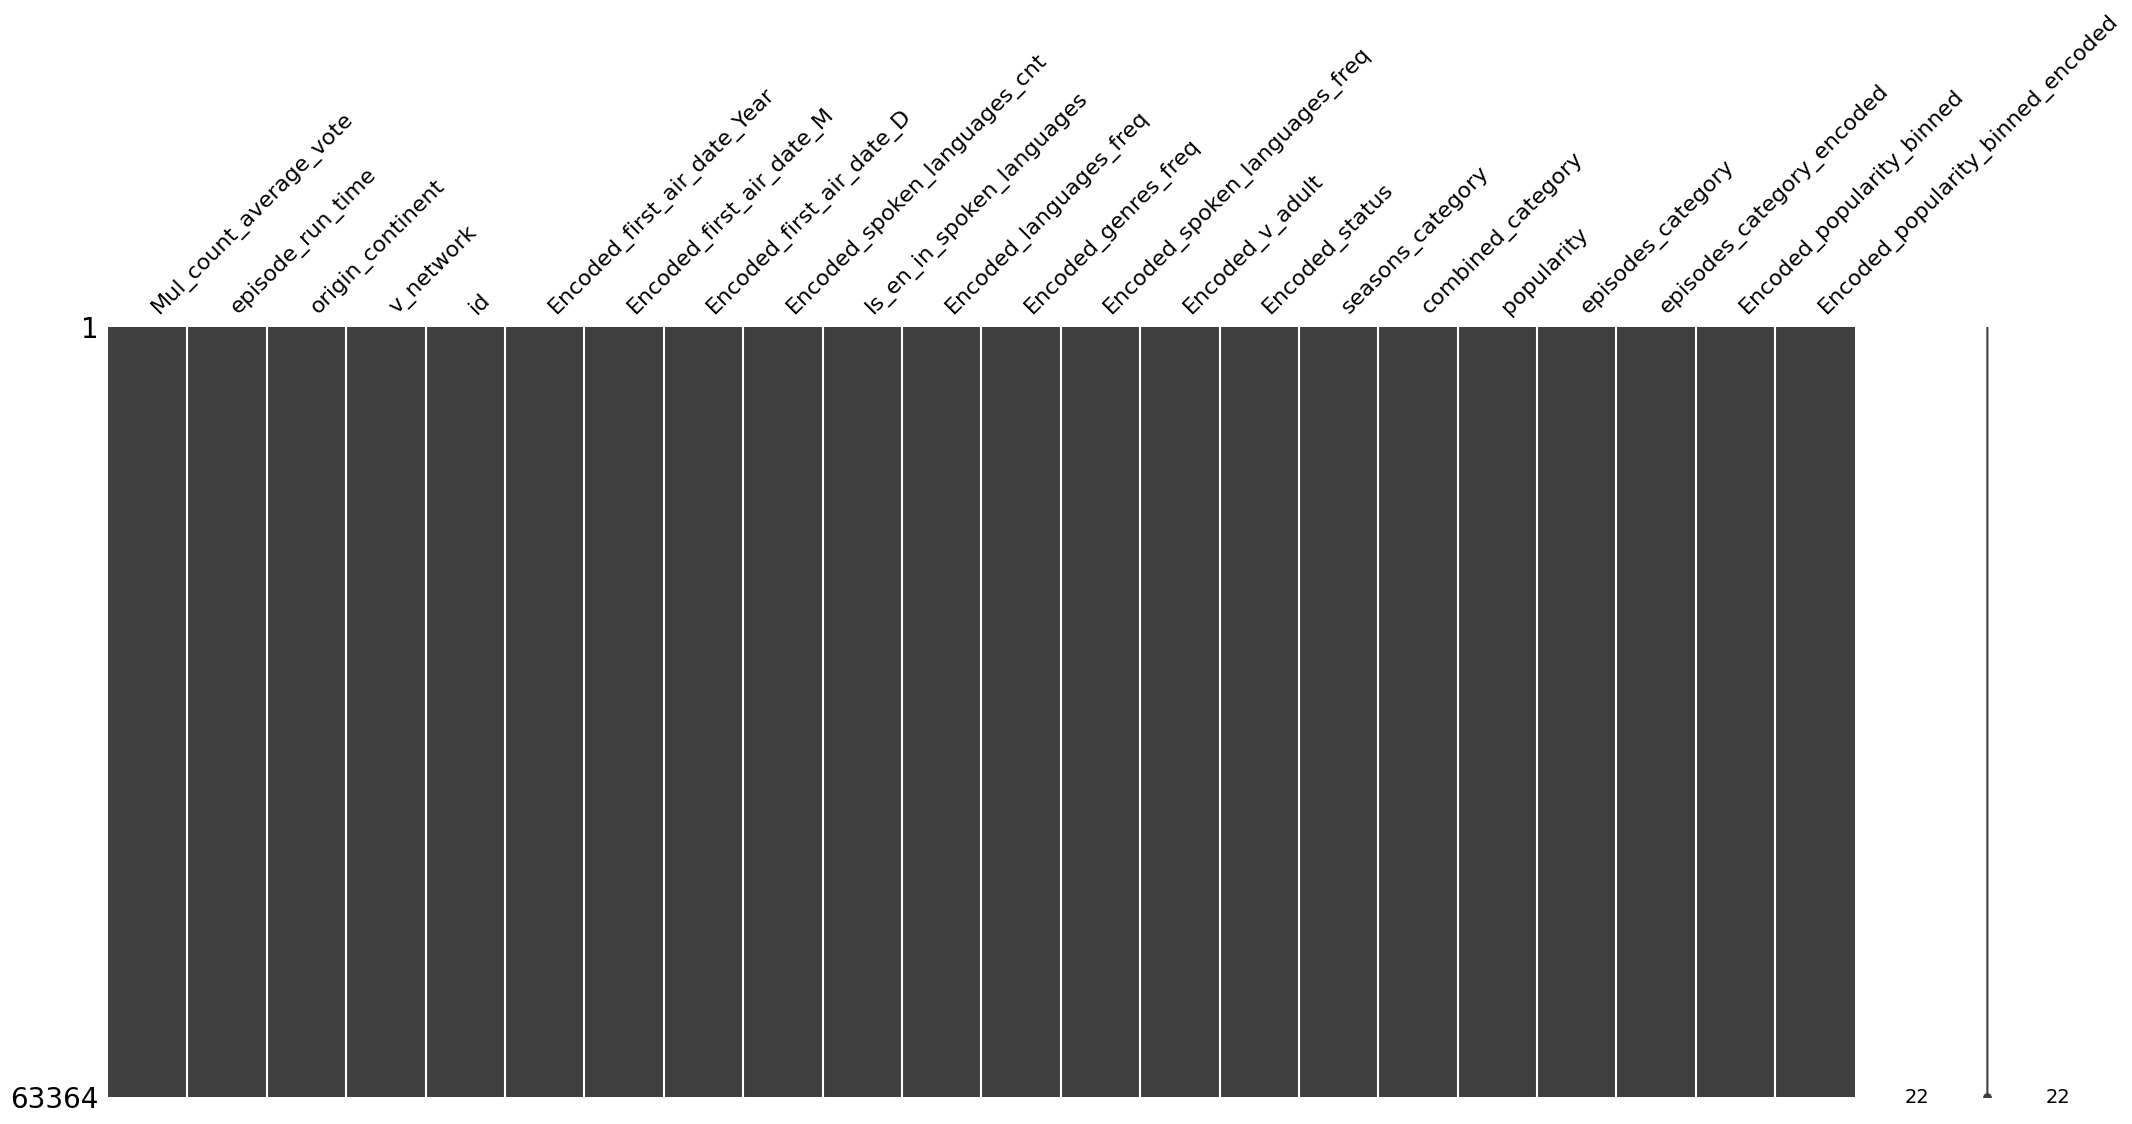

In [423]:
import missingno as msno
msno.matrix(imputed_data)

In [424]:
gy_savedf_to_excel(imputed_data, "LastButNotLeast")

In [425]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  float64 
 3   v_network                          63364 non-null  float64 
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Encoded_spoken_languages_cnt       63364 non-null  category
 9   Is_en_in_spoken_languages          63364 non-null  category
 10  Encoded_languages_freq             63364 non-null  category
 11  Encoded_genres_freq                63364 

In [428]:

#callSpecificNancheck(imputed_data)


Values from 'episodes_category':
  Row Index: 2184, Value: 0-10
  Row Index: 2405, Value: 0-10
  Row Index: 3080, Value: 0-10
  Row Index: 3440, Value: 0-10
  Row Index: 10746, Value: 0-10
  Row Index: 10812, Value: 0-10
  Row Index: 13382, Value: 0-10
  Row Index: 16926, Value: 0-10
  Row Index: 16946, Value: 0-10
  Row Index: 17697, Value: 0-10
  Row Index: 54720, Value: 0-10

Values from 'Encoded_popularity_binned':
  Row Index: 1432, Value: 0-612



KeyError: 'episodes_category_imputed'

In [429]:
# Save cleaned data - clean from outlier and clean forom popularity =0
#imputed_data.to_pickle('df_ReadyFromCleansing.pkl')

joblib.dump(imputed_data, 'df_ReadyFromCleansing.pkl')

['df_ReadyFromCleansing.pkl']

In [430]:

import pandas as pd
import joblib
#load from pickle 
#dfload1 = pd.read_pickle('df_ReadyFromCleansing.pkl')

dfload1 = joblib.load('df_ReadyFromCleansing.pkl')
dfload1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  float64 
 3   v_network                          63364 non-null  float64 
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Encoded_spoken_languages_cnt       63364 non-null  category
 9   Is_en_in_spoken_languages          63364 non-null  category
 10  Encoded_languages_freq             63364 non-null  category
 11  Encoded_genres_freq                63364 

In [431]:
# Create a DataFrame with data types and unique values count
info_df = pd.DataFrame({
    'Column': dfload1.columns,
    'Data Type': [dfload1[col].dtype for col in dfload1.columns],
    'Unique Values': [dfload1[col].nunique() for col in dfload1.columns],
     'Unique Values List': [dfload1[col].unique().tolist() if dfload1[col].nunique() < 20 else None for col in dfload1.columns  ]
    
    
})

# Print the table
(info_df)

,Column,Data Type,Unique Values,Unique Values List
0,Mul_count_average_vote,float64,1146,None
1,episode_run_time,float64,292,None
2,origin_continent,float64,6,"[2.0, 3.0, 5.0, 4.0, 1.0, 0.0]"
3,v_network,float64,5,"[2.0, 4.0, 0.0, 1.0, 3.0]"
4,id,int64,63364,None
5,Encoded_first_air_date_Year,category,8,"[2017, 2016, 2021, 2019, 2018, 2022, 2020, 2023]"
6,Encoded_first_air_date_M,category,12,"[5, 7, 1, 9, 6, 11, 2, 10, 3, 12, 4, 8]"
7,Encoded_first_air_date_D,category,31,None
8,Encoded_spoken_languages_cnt,category,11,"[1.0, 3.0, 4.0, 2.0, 8.0, 10.0, 5.0, 7.0, 6.0,..."
9,Is_en_in_spoken_languages,category,2,"[False, True]"


In [432]:
recheck_and_print(dfload1)

Column: Mul_count_average_vote
  Zeros treated: 37955
  Negatives treated: 0
  NaNs: 0

Column: episode_run_time
  Zeros treated: 32830
  Negatives treated: 0
  NaNs: 0

Column: origin_continent
  Zeros treated: 557
  Negatives treated: 0
  NaNs: 0

Column: v_network
  Zeros treated: 2006
  Negatives treated: 0
  NaNs: 0

Column: id
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: popularity
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0



In [ ]:
# despite the thinking that 0 value is missing i assume that if someone dislike totaly and realy he will not vote and also could give 0 as grade.
# so dont remove.